# Telecom Churn Prediction

**Author:** Tejas Kapasi

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

### Objective 
- To Predict the customers who are about to churn from a telecom operator
- Business Objective is to predict the High Value Customers only
- We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling) Churn would be based on Usage

### Requirement
- Churn Prediction Model 
- Best Predictor Variables

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os


### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing statsmodels
#import statsmodels.api as sm

# Importing 'variance_inflation_factor' or VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
#from sklearn.feature_selection import RFE

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

#from imblearn.over_sampling import SMOTE

from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE

from sklearn.model_selection import GridSearchCV


#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [2]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print('Training File Shape ', data.shape)
print('Testing / Unseen File Shape ', unseen.shape)
print('Sample Fie Shape Output Shape ' , sample.shape)
print('Data Dictionary Shape ' , data_dict.shape)

Training File Shape  (69999, 172)
Testing / Unseen File Shape  (30000, 171)
Sample Fie Shape Output Shape  (30000, 2)
Data Dictionary Shape  (36, 2)


1. Lets analyze the data dictionary versus the churn dataset.
2. The data dictonary contains a list of abbrevations which provide you all the information you need to understand what a specific feature/variable in the churn dataset represents
3. Example: 

- "arpu_7" -> Average revenue per user + KPI for the month of July
- "onnet_mou_6" ->  All kind of calls within the same operator network + Minutes of usage voice calls + KPI for the month of June

- "night_pck_user_8" -> Scheme to use during specific night hours only + Prepaid service schemes called PACKS + KPI for the month of August

- "max_rech_data_7" -> Maximum + Recharge + Mobile internet + KPI for the month of July

Its important to understand the definitions of each feature that you are working with, take notes on which feature you think might impact the churn rate of a user, and what sort of analysis could you do to understand the distribution of the feature better.

#### Steps involved 

### 1. Data Understanding, Preparation and Pre-Processing. 
- Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
- Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format

### 2. Exploratory Data Analysis
- Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
- Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data

### 3. Feature Engineering and Variable Transformation 
- Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
- Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data

### 4. Model Selection, Model Building, and  Prediction
- Identifying the type of problem and making a list of decisive models from all available choices
- Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
- Testing each model on the respective model evaluation metric
- Choosing the best model based on the fit of the data set and output variable
- Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

# 2. Data Understanding, Preparation and Pre-Processing. 

In [4]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [5]:
originalTrainData = data

In [6]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [7]:
pd.DataFrame(data.columns)

,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
167,aon
168,aug_vbc_3g
169,jul_vbc_3g
170,jun_vbc_3g


In [8]:
#Checking the numerical columns data distribution statistics
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [9]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [10]:
#Check for the duplicates rows 
data.drop_duplicates(subset=None, inplace=True)
data.shape

(69999, 172)

There are no duplicates in the data. 

In [11]:
# Converting the date columns to date time-dataframe

date_column= [column for column in data.columns if 'date' in column]

for i in data[date_column]:
    print(i)
    data[i] = pd.to_datetime(data[i])

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [12]:
#Dropping Date Columns Actually - Not Required for this use case. 
data = data.drop(date_column,axis=1)
data.shape

(69999, 163)

In [13]:
# While all other columns have utilised the integers "6,7,8,9" to indicate month name, certain columns representing volume-based users have month specified in their names.
#alphabetic_month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']
#data = data.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6'})

In [14]:
# Dropping columns with unique values.
columns = []
for i in data.columns:
    if data[i].nunique() ==1:
        columns.append(i)
data = data.drop(columns,axis=1)

In [15]:
data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [16]:
data.shape

(69999, 153)

In [17]:
# Let us create a seperate category for categorical columns
categorical_columns = []

for i in data.columns:
    if data[i].nunique()==2:
        categorical_columns.append(i)
categorical_columns 

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_probability']

In [18]:
#Target Variable removing from Categorical list. 
categorical_columns.remove('churn_probability')
categorical_columns

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [19]:
# Let us impute the missing values in categorical columns by (-1). Since Its Categorical column, to identify missing value class I used -1. 
data[categorical_columns] =  data[categorical_columns].apply(lambda x: x.fillna(-1)) 
data[categorical_columns] =  data[categorical_columns].astype('str')

In [20]:
# missing value ratio
data[categorical_columns].isnull().sum()*100/data.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [21]:
# all recharge variables check missing values. 
impute_0 = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [22]:
data[impute_0] = data[impute_0].apply(lambda x: x.fillna(0)) 

In [23]:
data[impute_0].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
dtype: int64

In [24]:
data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,-1.0,-1.0,-1.0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,-1.0,-1.0,-1.0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [25]:
data.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,334.213918,344.366927,351.924315,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,7.410000,6.675000,6.410000,34.860000,32.240000,31.575000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,370.791000,365.369500,369.909000,119.390000,115.837500,115.060000,232.990000,227.630000,229.345000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [26]:
# Now Checking Null values
null = round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

arpu_2g_6           74.90
count_rech_2g_6     74.90
arpu_3g_6           74.90
count_rech_3g_6     74.90
count_rech_3g_7     74.48
                    ...  
offnet_mou_7         3.84
onnet_mou_7          3.84
loc_ic_t2t_mou_7     3.84
loc_ic_t2f_mou_7     3.84
loc_ic_mou_7         3.84
Length: 93, dtype: float64

In [27]:
#Threshold % to consider the column to remove. 
MISSING_THRESHOLD = 70
miss_colns = null[null >= MISSING_THRESHOLD].index

In [28]:
miss_colns

Index(['arpu_2g_6', 'count_rech_2g_6', 'arpu_3g_6', 'count_rech_3g_6',
       'count_rech_3g_7', 'arpu_2g_7', 'arpu_3g_7', 'count_rech_2g_7',
       'count_rech_3g_8', 'arpu_3g_8', 'arpu_2g_8', 'count_rech_2g_8'],
      dtype='object')

In [29]:
data = data.drop(miss_colns,axis=1)

In [30]:
data.shape

(69999, 141)

In [31]:
numeric_cols = data.columns[data.apply(pd.api.types.is_numeric_dtype)]

print("Numeric columns:", numeric_cols)

Numeric columns: Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=135)


In [32]:
#imputing with meadian for num_cols
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()))

### Filter high-value customers

- we can take good phase ( it means month 6 and 7) data to get high value customers, We can use 70th percentile recharge amount ( The ones who have recharged above amount X, X is 70th Percentile)
- 

In [33]:
#Deriving a new column which will be a combination of 2 existing columns

#Total Data Recharge Amount = Average Recharge Amount Data * Number of Recharges for data ( Quantity) 

data['total_data_rech_6'] = data['av_rech_amt_data_6']* data['total_rech_data_6']
data['total_data_rech_7'] = data['av_rech_amt_data_7']* data['total_rech_data_7']
#data['total_data_rech_8'] = data['av_rech_amt_data_8']* data['total_rech_data_8']

In [34]:
#Total recharge amount spent historically
#Total Recharge Amount = Recharge Amount + Data Recharge Amount.  
data['total_amt_6'] = data[['total_rech_amt_6', 'total_data_rech_6']].sum(axis=1)
data['total_amt_7'] = data[['total_rech_amt_7', 'total_data_rech_7']].sum(axis=1)
#data['total_amt_8'] = data[['total_rech_amt_8', 'total_data_rech_8']].sum(axis=1)

In [35]:
#Total average recharge amount for the historic data
data['rech_amt_good_phase'] = data[['total_amt_6', 'total_amt_7']].sum(axis=1)
data['avg_rech_amt_good_phase'] = round(data['rech_amt_good_phase']/2,2)

In [36]:
data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,rech_amt_good_phase,avg_rech_amt_good_phase
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,142.0,71.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,290.0,145.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0.0,0.0,0.0,0,0.0,0.0,70.0,120.0,190.0,95.0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0.0,0.0,0.0,0,0.0,0.0,160.0,240.0,400.0,200.0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0.0,0.0,0.0,0,1225.0,1337.0,1515.0,1473.0,2988.0,1494.0


### Assumption - No clarity is provided on what percentile to be considered for high value customers but as per the industry standard taking 70. This is the assumption. 

In [37]:
percentage = data['avg_rech_amt_good_phase'].dropna().quantile(0.7)
percentage

np.float64(477.5)

In [38]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.avg_rech_amt_good_phase.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [39]:
# Segregating high value customers
high_val_customers = data.loc[data['avg_rech_amt_good_phase'] >= percentage]
high_val_customers.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,rech_amt_good_phase,avg_rech_amt_good_phase
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0.0,0.00,0.00,0,1225.0,1337.0,1515.0,1473.0,2988.0,1494.0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0.0,0.00,0.00,0,154.0,0.0,808.0,400.0,1208.0,604.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,0.0,0.00,0.00,0,0.0,0.0,1420.0,990.0,2410.0,1205.0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,...,0.0,0.00,0.00,0,23.0,92.0,463.0,519.0,982.0,491.0
27,27,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,182.83,...,700.4,185.71,173.72,0,820.0,608.0,1385.0,1180.0,2565.0,1282.5


In [40]:
high_val_customers.shape

(21013, 147)

In [41]:
#Remove not used columns now. or derived columns which is not required. 
del_col = ["total_rech_data_6", "total_rech_data_7", "av_rech_amt_data_6", "av_rech_amt_data_7", 'total_data_rech_6', 'total_data_rech_7', 'total_amt_6', 'total_amt_7']
high_val_customers = high_val_customers.drop(del_col,axis=1)

In [42]:
## We can also drop the average recharge amount of the good phase as we have filtered based on that value. 
high_val_customers = high_val_customers.drop('rech_amt_good_phase',axis=1)

In [43]:
## We can also drop the average recharge amount of the good phase as we have filtered based on that value. 
high_val_customers = high_val_customers.drop('avg_rech_amt_good_phase',axis=1)

In [44]:
high_val_customers.shape

(21013, 137)

### "Churn_Probability" is given, we will check based on month 8 data. 

- We didn't get target variable, we have to derive target variable. 
- We have month 8 data columns to derive - 'total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8' 

In [45]:
target_cols = ['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']

In [46]:
high_val_customers[target_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21013 entries, 4 to 69997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 820.8 KB


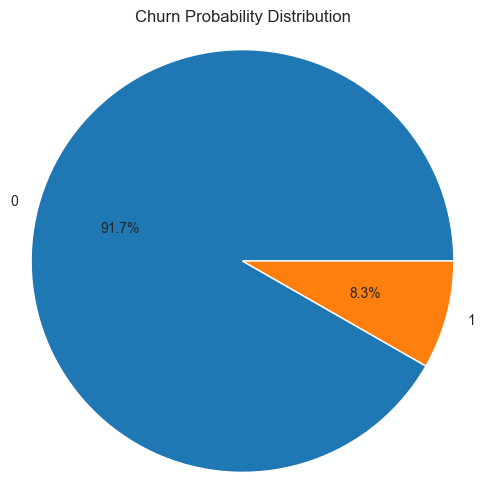

In [47]:
import matplotlib.pyplot as plt

# Step 1: Get value counts and calculate percentage
value_counts = high_val_customers['churn_probability'].value_counts()
percentage = (value_counts / len(high_val_customers)) * 100

# Step 2: Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%')
plt.title("Churn Probability Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


We can infer from this, 91.7 % customers do not churn. It seems like huge class imbalance in the data. 

In [48]:
# Let us see the number of churned customer
# 0 - Non_Churned and 1 - Churned Customers

high_val_customers['churn_probability'].value_counts()

churn_probability
0    19274
1     1739
Name: count, dtype: int64

In [49]:
print("The Percentage of churned customers is:" , round(100*(high_val_customers.churn_probability.astype("int").sum()/len(high_val_customers)),2))

The Percentage of churned customers is: 8.28


- Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _8) can be dropped forn the dataset.

In [50]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
high_val_customers_corr = high_val_customers.corr()
high_val_customers_corr.loc[:,:] = np.tril(high_val_customers_corr, k=-1)
high_val_customers_corr = high_val_customers_corr.stack()
high_val_customers_corr
high_val_customers_corr[(high_val_customers_corr > 0.80) | (high_val_customers_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8               0.958953
fb_user_6           night_pck_user_6     0.957744
isd_og_mou_8        isd_og_mou_7         0.956635
fb_user_7           night_pck_user_7     0.955499
fb_user_8           night_pck_user_8     0.954382
total_rech_amt_7    arpu_7               0.949969
total_rech_amt_6    arpu_6               0.946338
isd_og_mou_7        isd_og_mou_6         0.936012
isd_og_mou_8        isd_og_mou_6         0.934200
total_ic_mou_6      loc_ic_mou_6         0.901348
total_ic_mou_8      loc_ic_mou_8         0.898511
sachet_2g_8         total_rech_data_8    0.897476
total_ic_mou_7      loc_ic_mou_7         0.883143
std_og_t2t_mou_7    onnet_mou_7          0.861786
std_og_t2t_mou_6    onnet_mou_6          0.860921
std_og_t2t_mou_8    onnet_mou_8          0.858635
std_og_t2m_mou_7    offnet_mou_7         0.857958
std_og_t2m_mou_8    offnet_mou_8         0.855066
total_og_mou_8      std_og_mou_8         0.850737
total_og_mou_7      std_og_mou_7         0.850341


In [51]:
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7']
high_val_customers.drop(col_to_drop,axis=1,inplace=True)

In [52]:
high_val_customers.shape

(21013, 129)

In [53]:
# #Now, Target Variable is created from all 8 columns so let's remove all 8 columns. 
# columns_8 = [i for i in high_val_customers.columns if '8' in i]
# high_val_customers = high_val_customers.drop(columns_8,axis=1)
# high_val_customers.shape

In [54]:
#Just Checking Age on Network. 
high_val_customers['aon'].head()

4      647
15     602
23     455
24    1219
27     573
Name: aon, dtype: int64

In [55]:
#Convert AON to Years ( Age on Network) 
high_val_customers['aon_tenure_months'] = round((high_val_customers['aon']/30).round(0),1)

In [56]:
#dropping old field aon.
high_val_customers.drop('aon', axis=1, inplace=True)
high_val_customers.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_tenure_months
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,0,1,0,1.0,0.0,0.00,0.00,0,22.0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,0,0,0,1.0,0.0,0.00,0.00,0,20.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,0,0,0,0,-1.0,0.0,0.00,0.00,0,15.0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,...,0,0,0,0,0.0,0.0,0.00,0.00,0,41.0
27,27,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,182.83,...,1,0,1,1,1.0,700.4,185.71,173.72,0,19.0


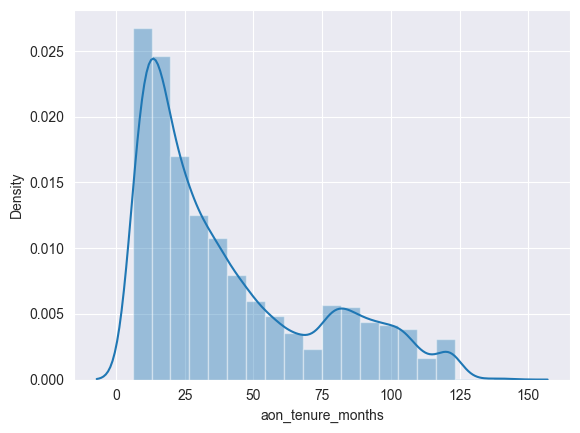

In [57]:
# Checking the distribution 

sns.distplot(high_val_customers['aon_tenure_months'],bins=20)
plt.show()

In [58]:
#Grouping Age on Network so that we can plot histogram. 
aon_range = [0, 6, 12, 24, 60, 120]
aon_label = ['0-6 Months', '6-12 Months', '1-2 Years', '2-5 Years', '5+ Years']

high_val_customers['aon_range'] = pd.cut(high_val_customers['aon_tenure_months'], aon_range, labels=aon_label)

high_val_customers['aon_range'].value_counts()

aon_range
2-5 Years      6632
1-2 Years      5427
5+ Years       4698
6-12 Months    3521
0-6 Months      362
Name: count, dtype: int64

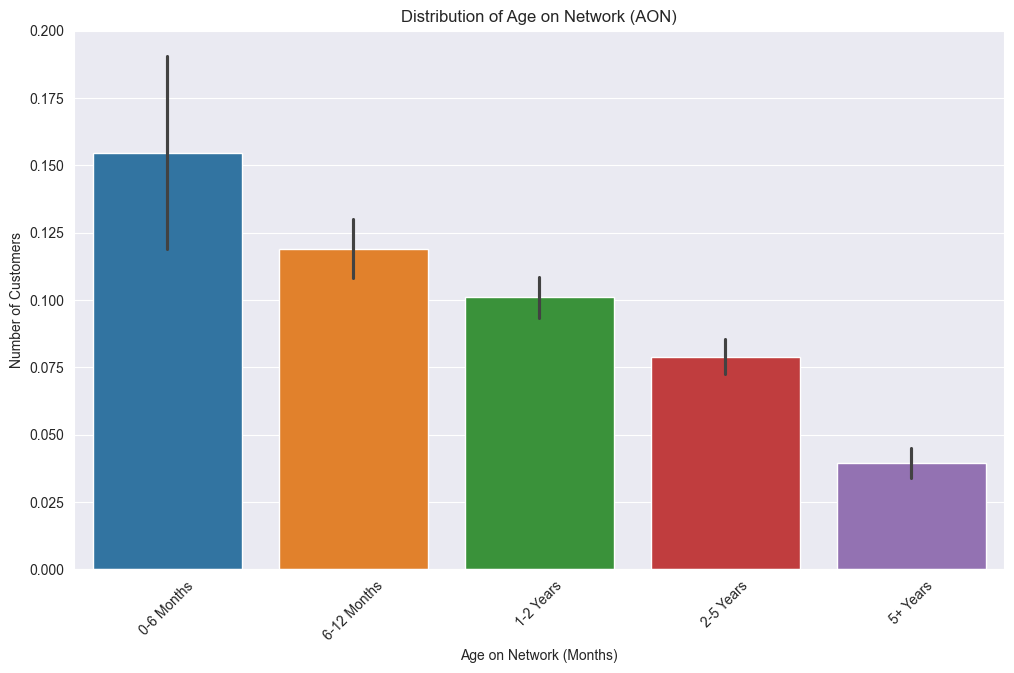

In [59]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='aon_range',y='churn_probability', data=high_val_customers,palette='tab10')
plt.title('Distribution of Age on Network (AON)')
plt.xlabel('Age on Network (Months)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

We can understand from this visual, maximum churning is happening in first 6 month. Then further 6 month. 

In [60]:
# let us append our age group column to categorical column list
#categorical_columns.append('aon_range')
#categorical_columns

Let's check Average Revenue now for good phase. 

In [61]:
high_val_customers['avg_arpu_6_7'] = (high_val_customers['arpu_6']+high_val_customers['arpu_7'])/2

In [62]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data
high_val_customers.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [63]:
high_val_customers.shape

(21013, 129)

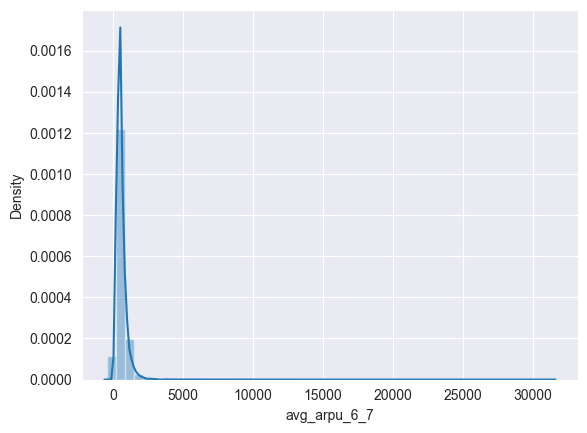

In [64]:
# Visualizing the column created
sns.distplot(high_val_customers['avg_arpu_6_7'])
plt.show()

Let's check the correlation of target "churn_probability" with other variables. 

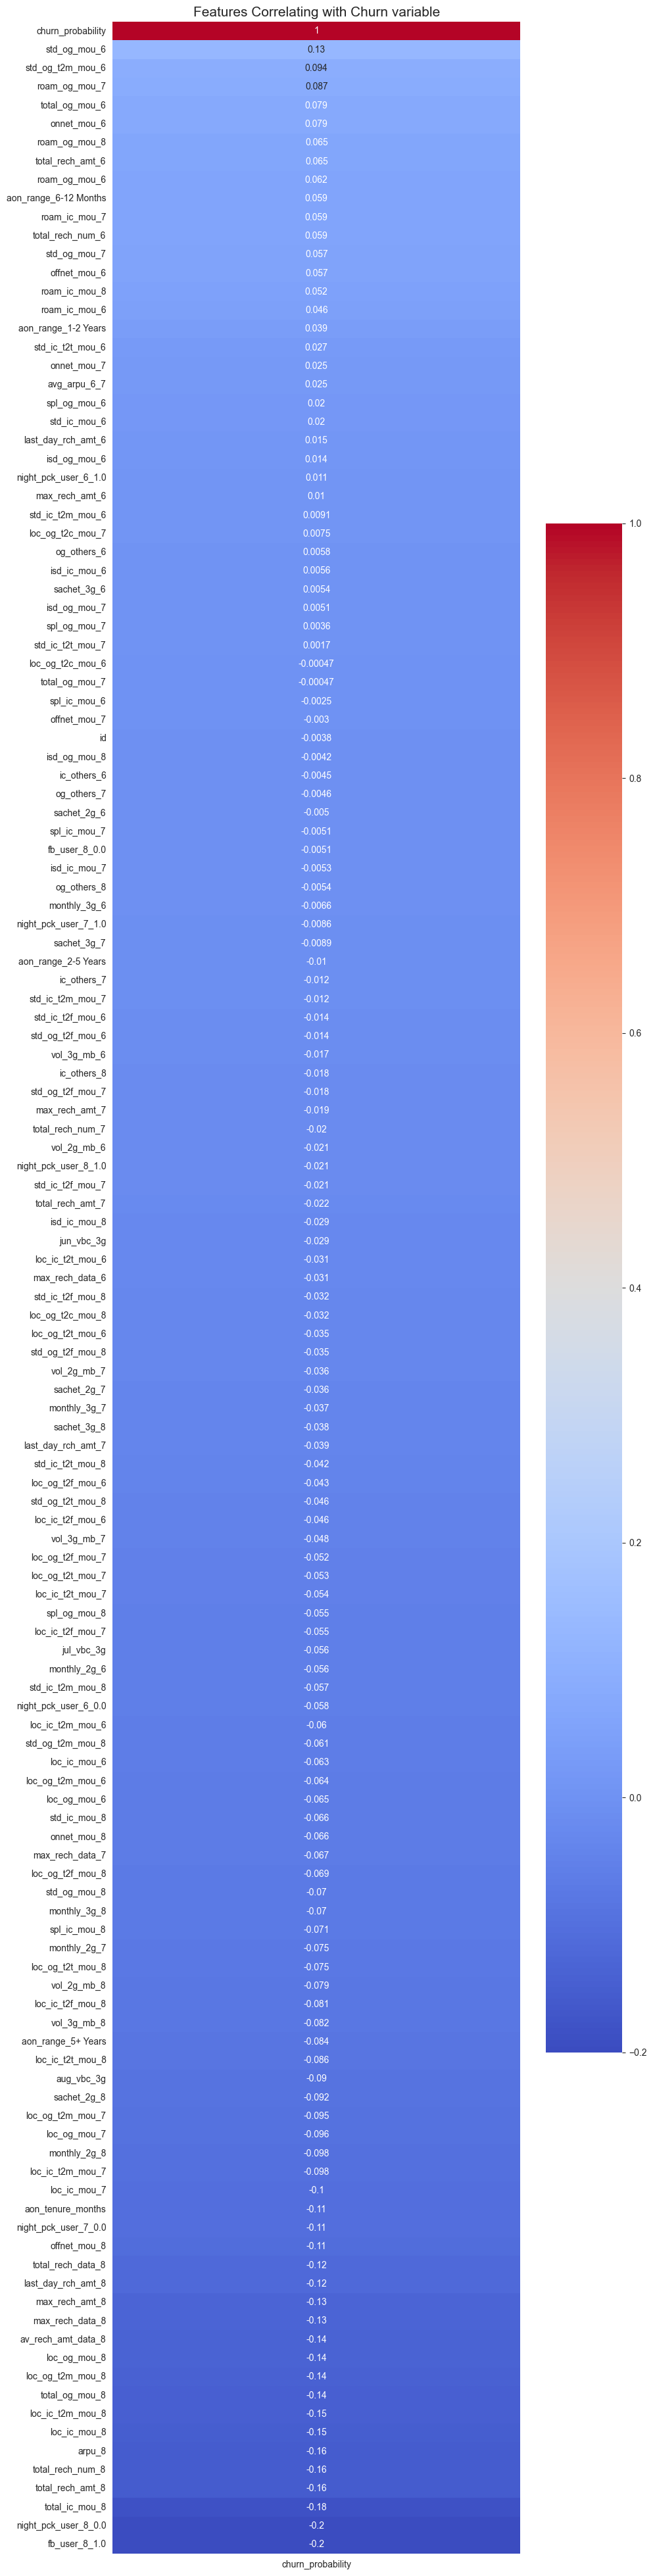

In [65]:
# One-hot encode categorical variables
high_val_customers_encoded = pd.get_dummies(high_val_customers, drop_first=True)

# Calculate the correlation matrix for the encoded dataset
plt.figure(figsize=(10, 50))
heatmap_churn_corr = sns.heatmap(high_val_customers_encoded.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'), 
                                 annot=True, cmap='coolwarm')

# Set the title
heatmap_churn_corr.set_title("Features Correlating with Churn variable", fontsize=15)
plt.show()

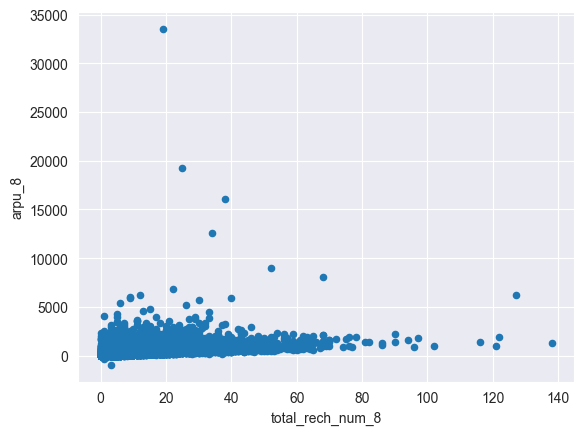

In [66]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
high_val_customers[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

Let's take a little deeper look at column 8 recharge and count. 

In [67]:
high_val_customers['total_rech_data_group_8']=pd.cut(high_val_customers['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
high_val_customers['total_rech_num_group_8']=pd.cut(high_val_customers['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

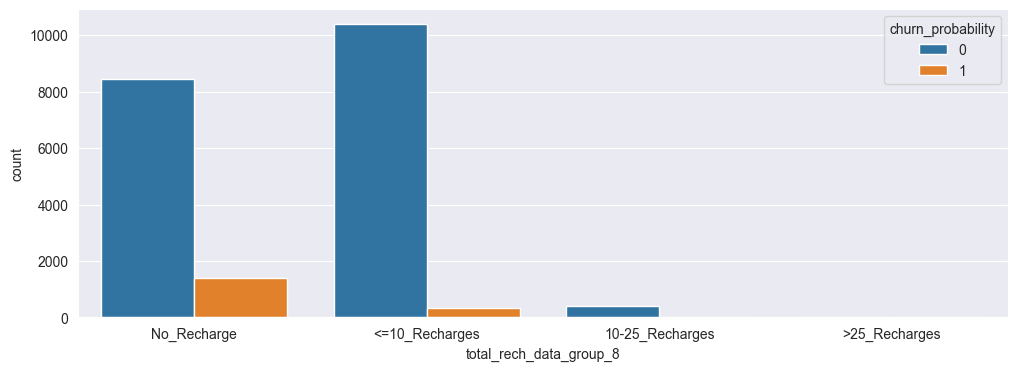

In [68]:
plt.figure(figsize=[12,4])
sns.countplot(data=high_val_customers,x="total_rech_data_group_8",hue="churn_probability")
plt.show()

In [69]:
high_val_customers['total_rech_data_group_8'].value_counts()

total_rech_data_group_8
<=10_Recharges     10729
No_Recharge         9833
10-25_Recharges      421
>25_Recharges         30
Name: count, dtype: int64

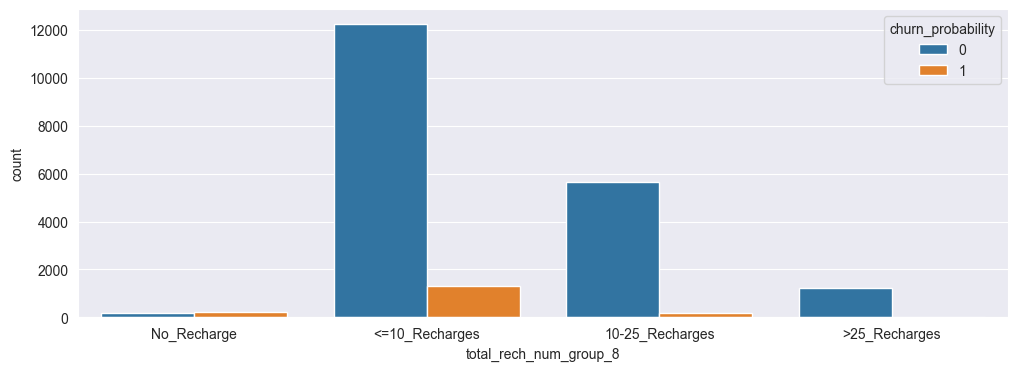

In [70]:
plt.figure(figsize=[12,4])
sns.countplot(data=high_val_customers,x="total_rech_num_group_8",hue="churn_probability")
plt.show()

In [71]:
high_val_customers['total_rech_num_group_8'].value_counts()

total_rech_num_group_8
<=10_Recharges     13533
10-25_Recharges     5829
>25_Recharges       1255
No_Recharge          396
Name: count, dtype: int64

#### Based on above correlation let's remove below columns. As we have created derived ones already. 

In [72]:
col1 = ['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7','total_rech_data_group_8','total_rech_num_group_8',
              'last_day_rch_amt_8','aon_range']

In [73]:
col2 = [ 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
         'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8']
len(col2)

62

In [74]:
col = list(set(col1 + col2))

In [75]:
high_val_customers[col].describe()

,loc_ic_t2f_mou_6,std_og_mou_8,spl_og_mou_7,loc_og_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,isd_og_mou_7,spl_ic_mou_6,loc_og_mou_7,spl_ic_mou_7,...,sachet_2g_7,loc_ic_t2m_mou_6,loc_og_mou_8,isd_ic_mou_8,loc_og_t2c_mou_6,loc_ic_t2t_mou_7,roam_ic_mou_6,std_ic_mou_6,std_ic_t2f_mou_6,std_og_t2m_mou_6
count,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,...,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,15.356234,310.265082,7.142102,151.609771,14.443160,15.224972,2.223897,0.061762,253.879761,0.018935,...,1.215486,150.496267,236.088582,10.954235,1.593134,66.220354,16.084861,46.189089,2.728228,182.224205
std,44.724887,607.823028,23.339580,227.046606,69.852284,81.491922,52.077796,0.198378,372.466484,0.140968,...,2.763354,215.055889,361.698716,69.987386,6.637590,163.210755,77.460567,128.739702,19.876127,408.716688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.010000,0.000000,19.130000,0.000000,0.000000,0.000000,0.000000,38.710000,0.000000,...,0.000000,31.430000,32.010000,0.000000,0.000000,7.860000,0.000000,1.410000,0.000000,0.000000
50%,1.860000,26.160000,0.680000,67.780000,0.380000,0.430000,0.000000,0.000000,126.830000,0.000000,...,0.000000,83.540000,110.740000,0.000000,0.000000,25.580000,0.000000,11.280000,0.000000,16.790000
75%,12.010000,360.180000,6.940000,196.390000,8.190000,8.480000,0.000000,0.000000,327.490000,0.000000,...,1.000000,188.180000,308.590000,0.000000,0.000000,68.210000,0.000000,41.190000,0.100000,158.930000
max,1373.090000,13980.060000,1265.790000,4961.330000,3038.340000,4708.710000,5490.280000,19.760000,7674.780000,13.460000,...,48.000000,4450.740000,11039.910000,3432.880000,271.440000,5709.590000,2613.310000,3929.240000,1351.110000,8314.760000


In [76]:
# creating a list of column names for each month
mon_6_cols = [col for col in col2 if '_6' in col]
mon_7_cols = [col for col in col2 if '_7' in col]
mon_8_cols = [col for col in col2 if '_8' in col]
other_cols = [col for col in col if '_6' not in col and '_7' not in col and '_8' not in col]

In [77]:
print("Columns for month 6:", mon_6_cols)
print("Columns for month 7:", mon_7_cols)
print("Columns for month 8:", mon_8_cols)
print("Other columns:", other_cols)

Columns for month 6: ['roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6']
Columns for month 7: ['roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7']
Columns for month 8: ['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8'

In [78]:
print("Length for month 6:" , len(mon_6_cols))
print("Length for month 7:" , len(mon_7_cols))
print("Length for month 8:" , len(mon_8_cols))
print("Length for other :" , len(other_cols))

Length for month 6: 23
Length for month 7: 20
Length for month 8: 19
Length for other : 1


In [79]:
high_val_customers.drop(col,axis=1,inplace=True)

In [80]:
high_val_customers.shape

(21013, 56)

In [81]:
list(high_val_customers.columns)

['id',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'isd_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_7',
 'total_og_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'fb_user_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'churn_probability',
 'aon_tenure_months',
 'avg_arpu_6_7']

In [82]:
# Let us observe missing values in recharge columns 
rech_col = [i for i in high_val_customers.columns if 'rech' in i]
rech_6_col = [i for i in rech_col if '6' in i]
rech_7_col = [i for i in rech_col if '7' in i]

In [83]:
# Let us observe missing values in recharge columns in the month of june(6)
rech_6 = pd.DataFrame(high_val_customers[rech_6_col])

# adding some other columns describing data usage of customer in june(6)
vol_col = high_val_customers[["vol_2g_mb_6",'vol_3g_mb_6']]

rech_6 = pd.concat([rech_6,vol_col], axis = 1) 
rech_6.head(10)

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,max_rech_data_6,vol_2g_mb_6,vol_3g_mb_6
4,13,290,50,25.0,390.80,0.00
15,5,654,250,154.0,260.42,0.00
23,26,1420,110,0.0,0.00,0.00
24,7,440,110,23.0,0.04,0.00
27,13,565,154,154.0,5.99,374.70
33,1,505,505,505.0,0.00,756.47
39,4,448,154,154.0,1884.40,0.00
45,24,1768,150,41.0,54.48,308.49
49,24,446,50,0.0,0.00,0.00
52,10,504,128,0.0,0.00,0.00


In [84]:
# Similarly Let's look at the July missing data in the recharge columns (7)
rech_7_col

['total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_data_7']

In [85]:
rech_7 = pd.DataFrame( high_val_customers[rech_7_col])

# adding some other columns describing data usage of customer in july
vol_col =  high_val_customers[["vol_2g_mb_7",'vol_3g_mb_7']]

rech_7 = pd.concat([rech_7,vol_col], axis = 1) 
rech_7.head(10)

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,max_rech_data_7,vol_2g_mb_7,vol_3g_mb_7
4,10,136,41,41.0,308.89,0.00
15,3,400,250,0.0,0.00,0.00
23,19,990,110,0.0,0.00,0.00
24,7,427,110,23.0,0.00,0.00
27,8,572,200,152.0,92.93,275.38
33,3,0,0,0.0,0.00,0.00
39,14,716,154,154.0,1312.21,0.00
45,29,2076,250,46.0,106.61,478.02
49,50,776,36,0.0,0.00,0.00
52,11,506,120,0.0,0.00,0.00


Now, Let's check new correlation via heatmap. 

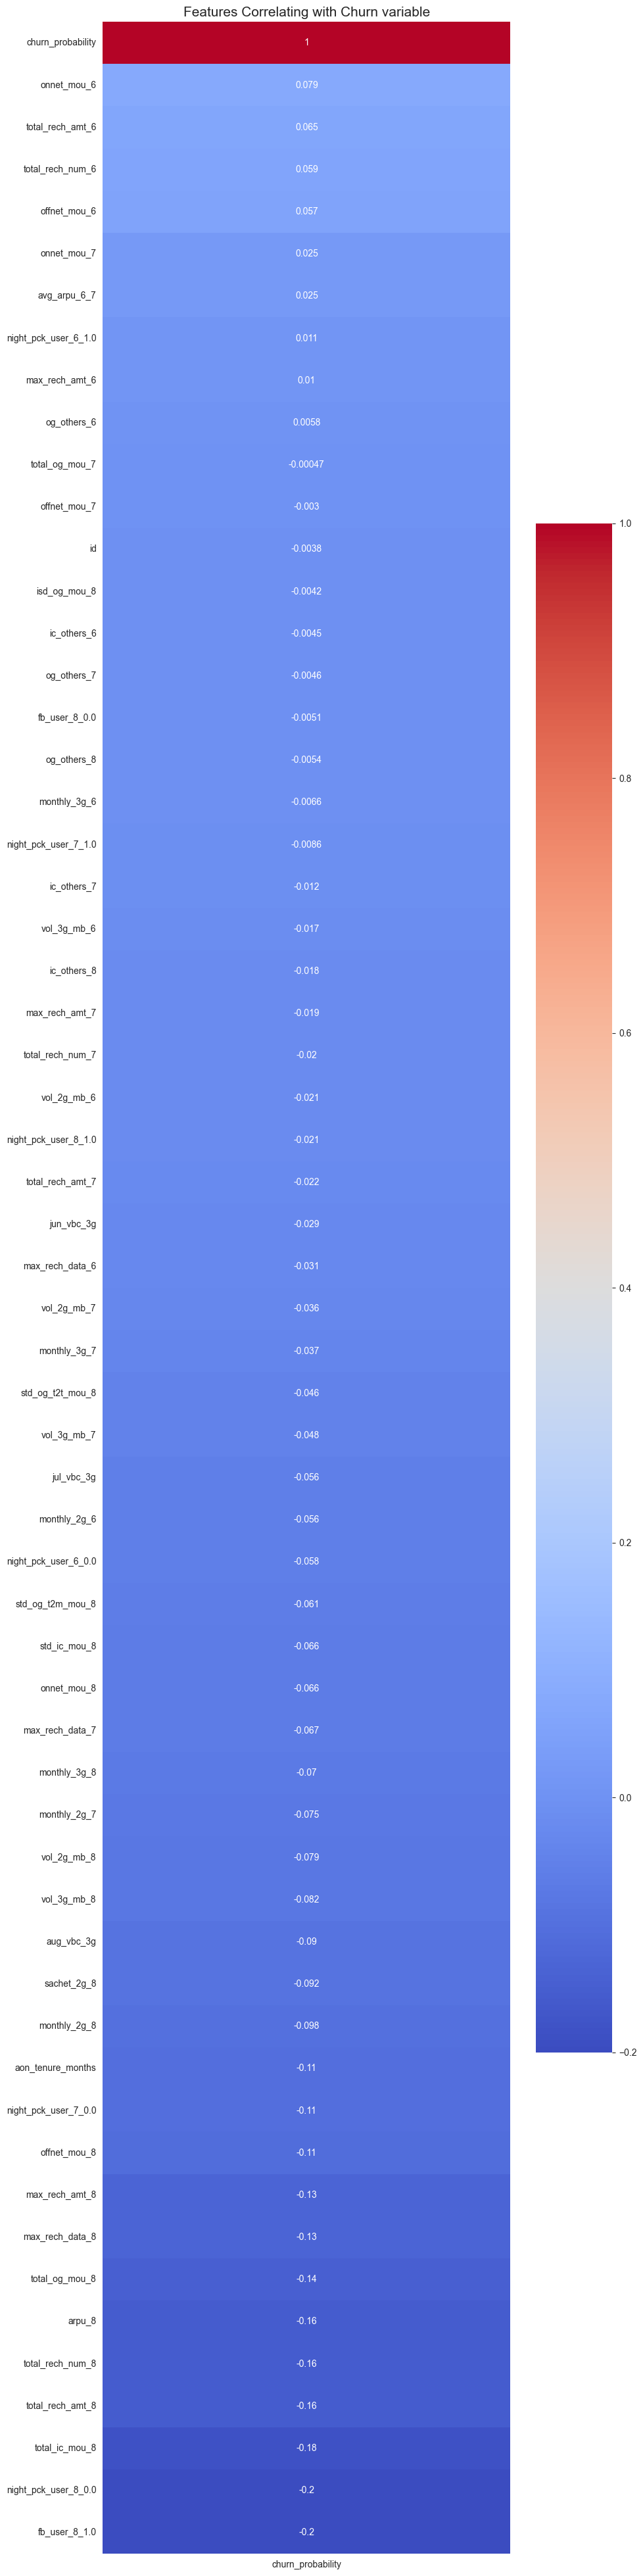

In [86]:
# One-hot encode categorical variables
high_val_customers_encoded = pd.get_dummies(high_val_customers, drop_first=True)

# Calculate the correlation matrix for the encoded dataset
plt.figure(figsize=(10, 50))
heatmap_churn_corr = sns.heatmap(high_val_customers_encoded.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'), 
                                 annot=True, cmap='coolwarm')

# Set the title
heatmap_churn_corr.set_title("Features Correlating with Churn variable", fontsize=15)
plt.show()

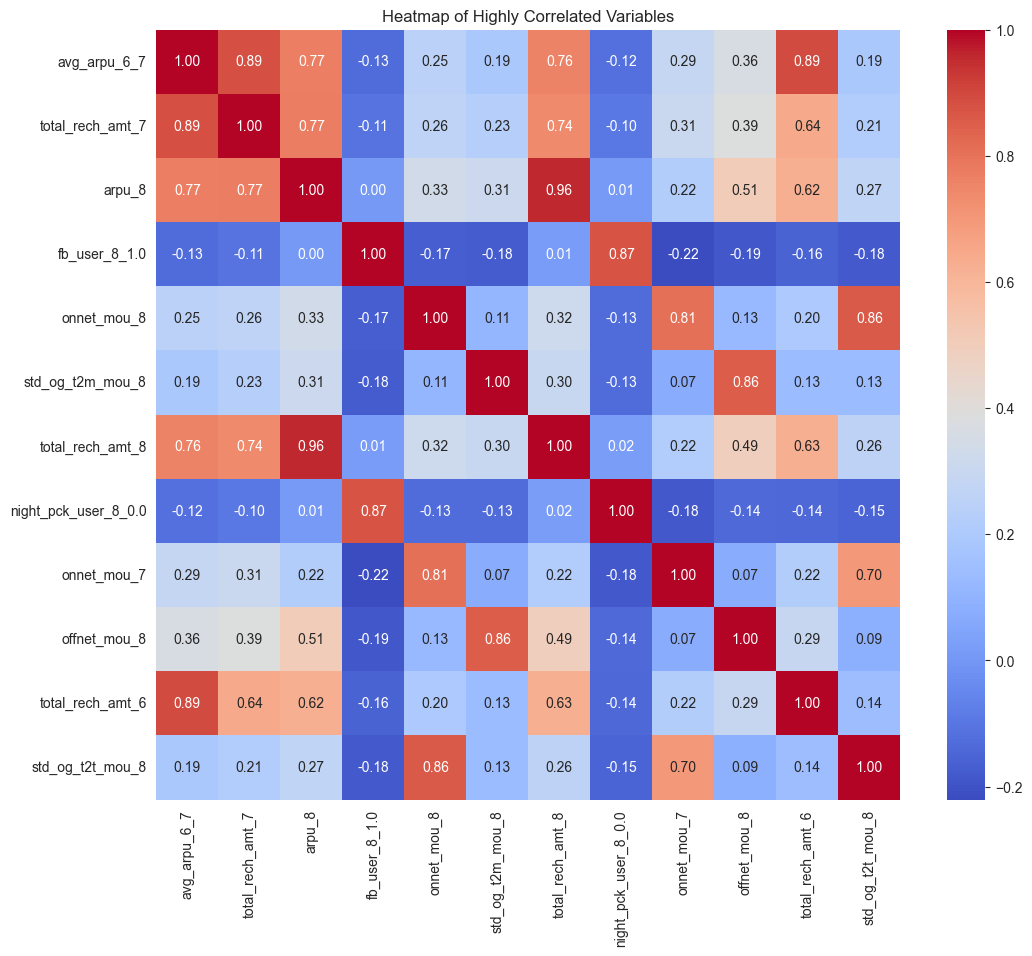

In [87]:
## Now Display Heat Map of highly correlated variables. 
# Compute the correlation matrix
corr_matrix = high_val_customers_encoded.corr()

# Define a correlation threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_corr_var = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_var.add(colname)
            colname = corr_matrix.columns[j]
            high_corr_var.add(colname)

# Create a subset of the correlation matrix with highly correlated variables
high_corr_var = list(high_corr_var)
subset_corr = corr_matrix.loc[high_corr_var, high_corr_var]

# Plot the zoomed-in heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Highly Correlated Variables")
plt.show()

In [88]:
high_val_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21013 entries, 4 to 69997
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21013 non-null  int64  
 1   arpu_8             21013 non-null  float64
 2   onnet_mou_6        21013 non-null  float64
 3   onnet_mou_7        21013 non-null  float64
 4   onnet_mou_8        21013 non-null  float64
 5   offnet_mou_6       21013 non-null  float64
 6   offnet_mou_7       21013 non-null  float64
 7   offnet_mou_8       21013 non-null  float64
 8   std_og_t2t_mou_8   21013 non-null  float64
 9   std_og_t2m_mou_8   21013 non-null  float64
 10  isd_og_mou_8       21013 non-null  float64
 11  og_others_6        21013 non-null  float64
 12  og_others_7        21013 non-null  float64
 13  og_others_8        21013 non-null  float64
 14  total_og_mou_7     21013 non-null  float64
 15  total_og_mou_8     21013 non-null  float64
 16  std_ic_mou_8       21013 no

Drop rows with All Null values Rows, Rows with all columns null. - None exist check. 

In [89]:
high_val_customers = high_val_customers.dropna(how='all',axis=0) 

In [90]:
high_val_customers.shape


(21013, 56)

Dropping date columns - This date columns don't add values for deciding churn output. 

In [91]:
#It is crucial to examine the dataset for skewness since biased results might be produced by skewed data
df =pd.DataFrame(high_val_customers.drop('id',axis=1).skew().sort_values(ascending = False))
df.columns = ['Skewness']
df

,Skewness
og_others_7,115.043918
og_others_8,107.616884
og_others_6,103.449442
isd_og_mou_8,81.046513
ic_others_6,55.510801
ic_others_8,46.323944
ic_others_7,43.976042
total_rech_amt_8,21.420807
avg_arpu_6_7,20.883992
total_rech_amt_7,18.792428


It seems some columns are very highly skewed, Right Skewed ( Positive Skweness) - Tail is on the right side.

In [92]:
rech_amt_columns = high_val_customers.columns[high_val_customers.columns.str.contains('rech_amt|rech_data')]
rech_amt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8']

# 3. Exploratory Data Analysis

In [93]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20, 16))
    df = high_val_customers
    
    
    plt.subplot(2, 3, 1)
    sns.boxplot(data=df, y=attribute+"_6", x="churn_probability", hue="churn_probability", showfliers=False, palette="tab10")
    
    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, y=attribute+"_7", x="churn_probability", hue="churn_probability", showfliers=False, palette="tab10")
    
    plt.show()

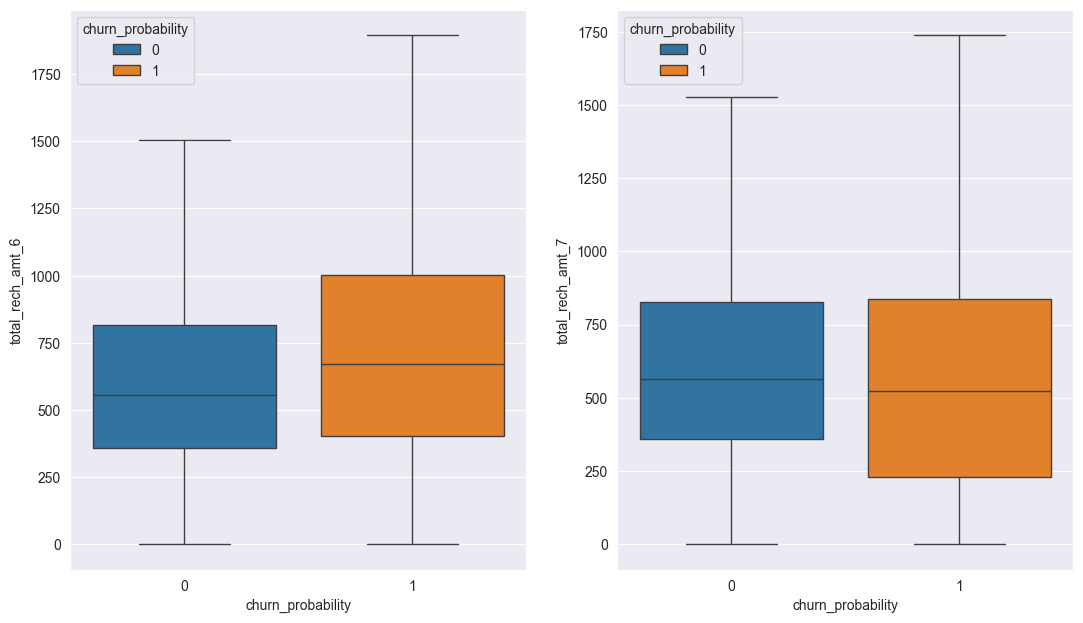

In [94]:
plot_box_chart('total_rech_amt')

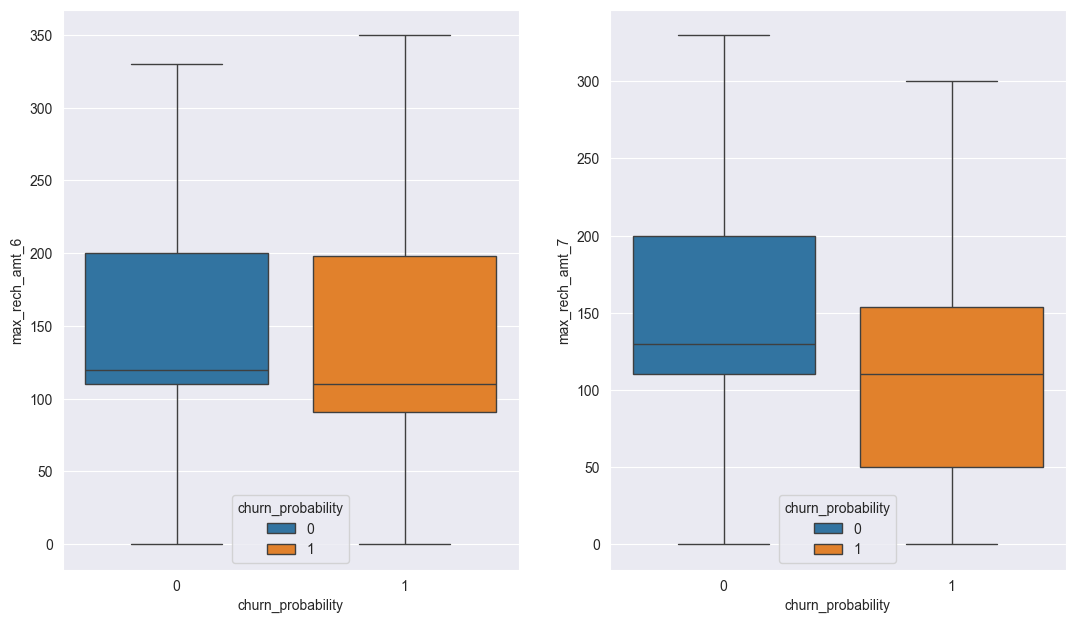

In [95]:
plot_box_chart('max_rech_amt')

In [96]:
def plot_distributions(dataframe, columns, cols_per_row=3):
    num_columns = len(columns)
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for i, col in enumerate(columns):
        sns.distplot(dataframe[col], ax=axes[i], label=col)
        axes[i].legend()
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

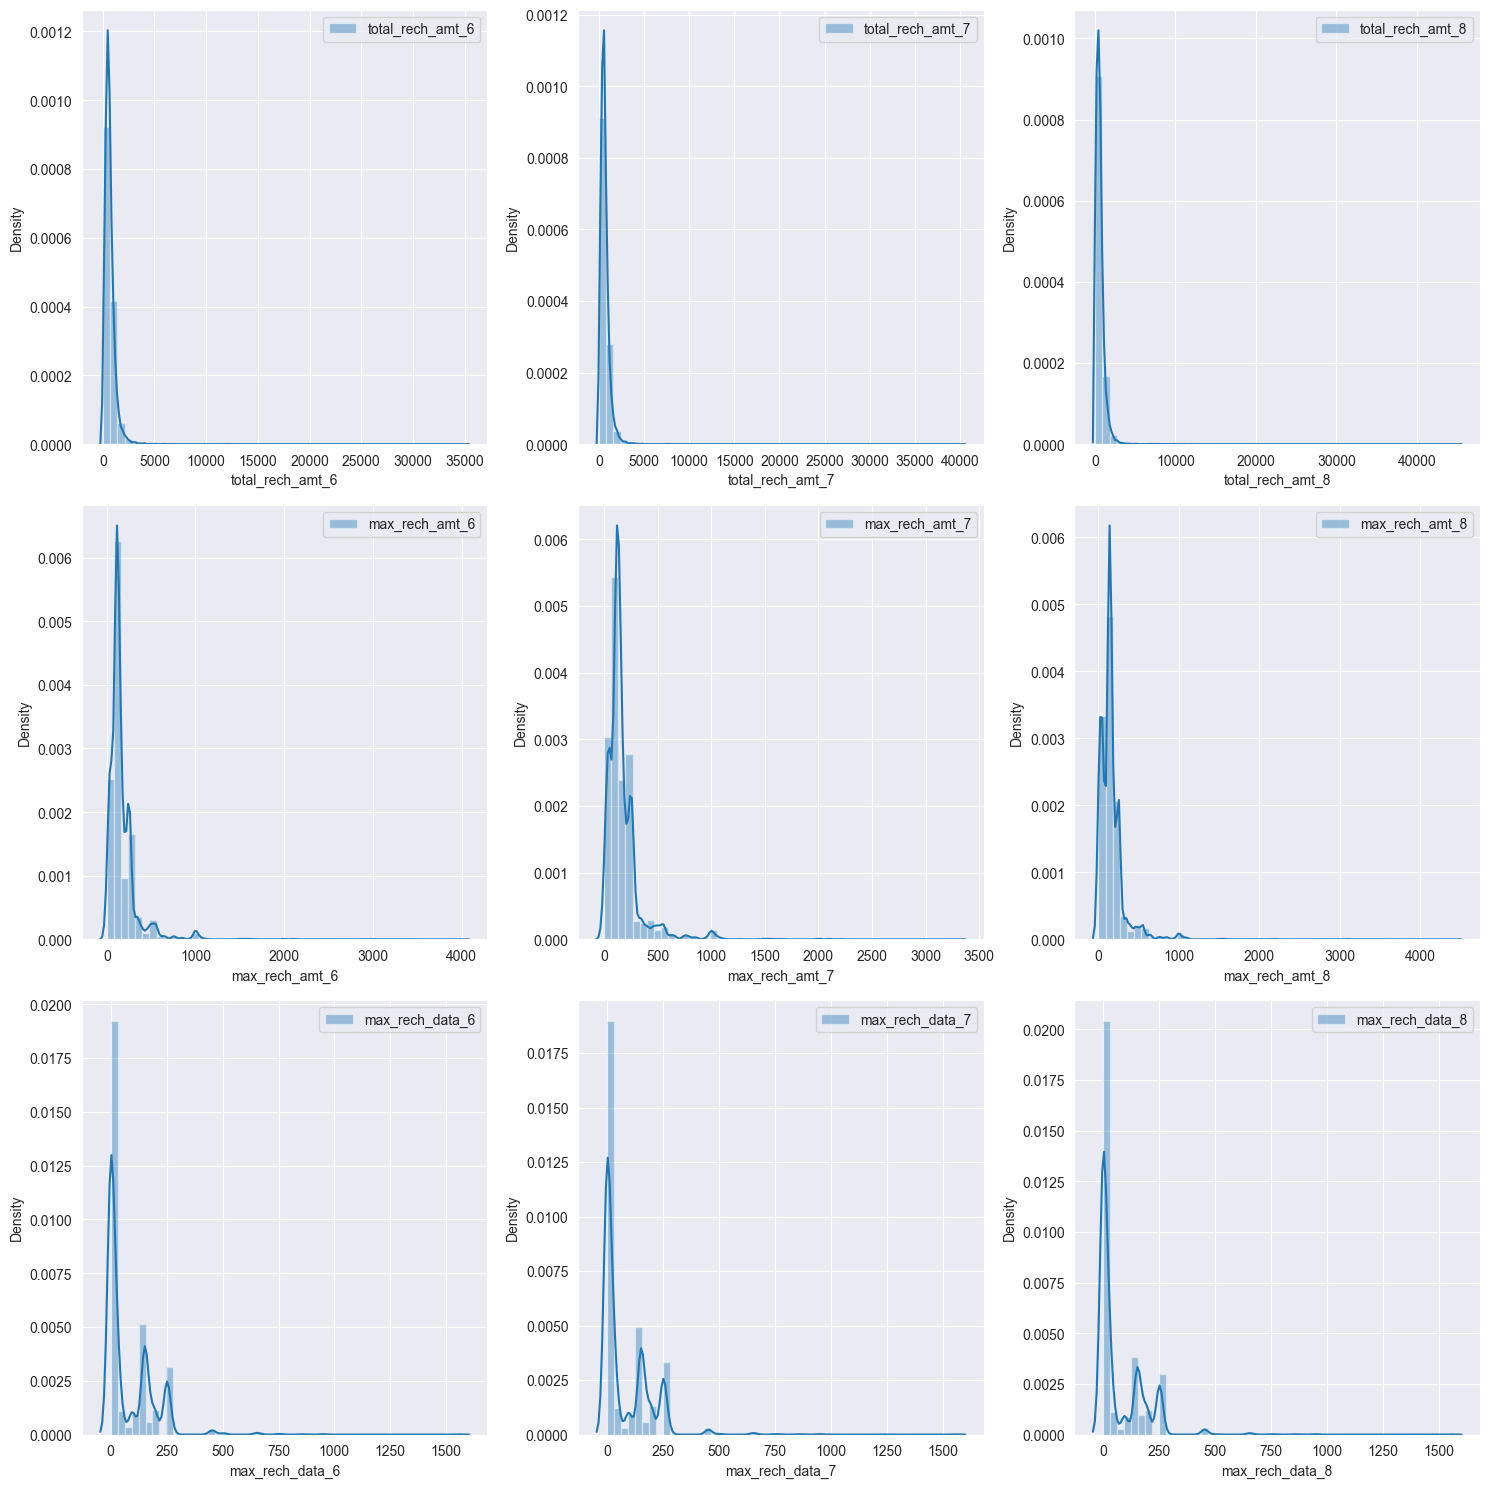

In [97]:
plot_distributions(high_val_customers, rech_amt_columns)

In [98]:
def plot_boxplots(dataframe, column_pattern, num_columns=3):
    # Filter columns that contain the specified pattern
    columns = dataframe.columns[dataframe.columns.str.contains(column_pattern)]
    
    # Determine the number of rows needed
    num_rows = (len(columns) + num_columns - 1) // num_columns
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each boxplot
    for idx, col in enumerate(columns):
        sns.boxplot(dataframe[col], ax=axes[idx])
        axes[idx].set_title('Boxplot of ' + col)
        axes[idx].set_xlabel(col)
    
    # Remove any unused subplots
    for idx in range(len(columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

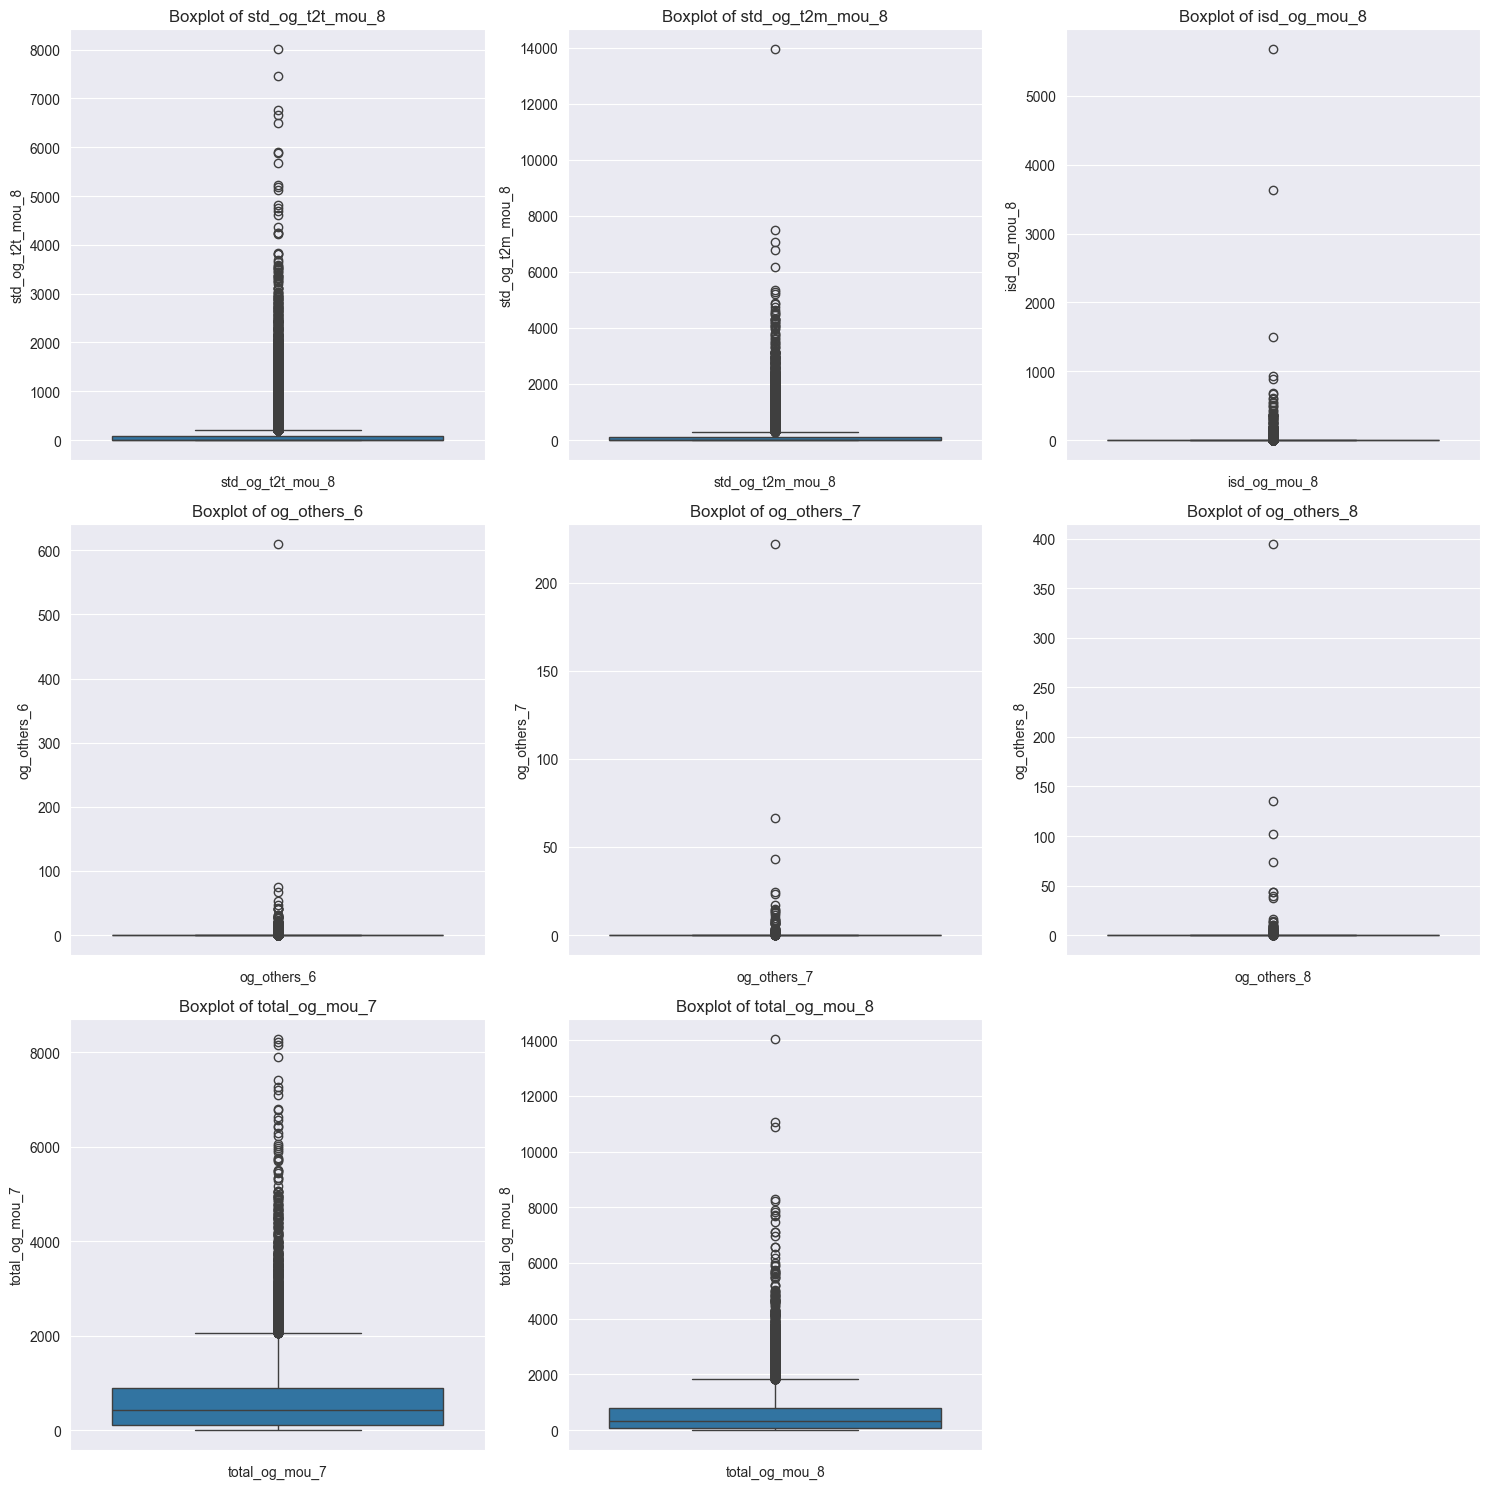

In [99]:
# Call the function for Outgoing variables. 
plot_boxplots(high_val_customers, "og")

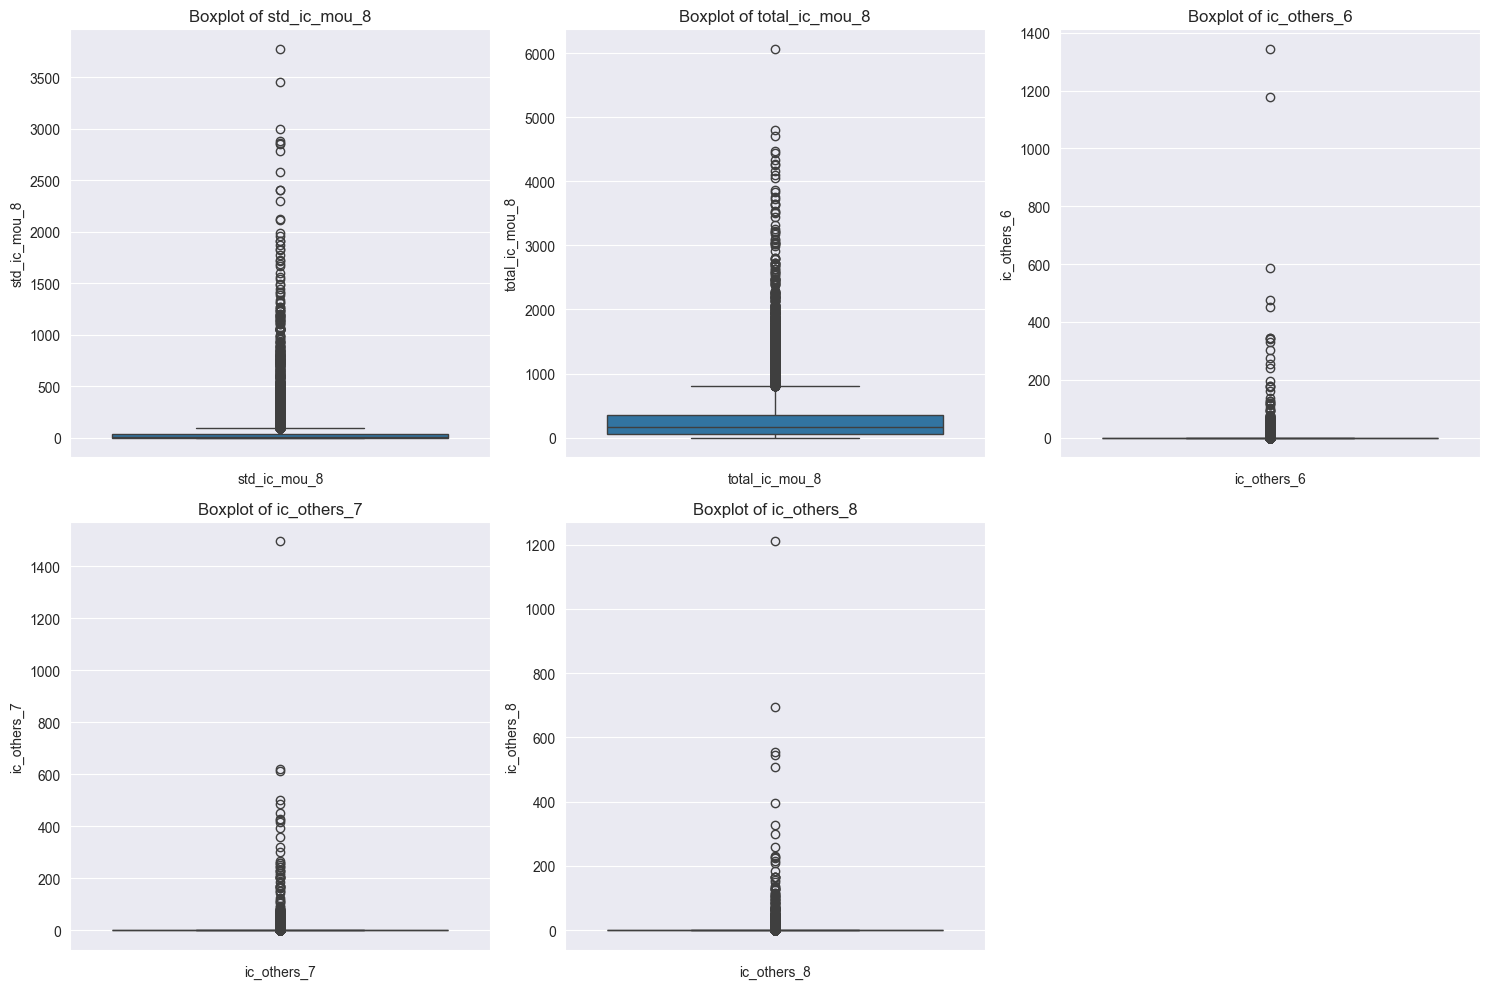

In [100]:
#Call the function for Incoming variables. 
plot_boxplots(high_val_customers, "ic")

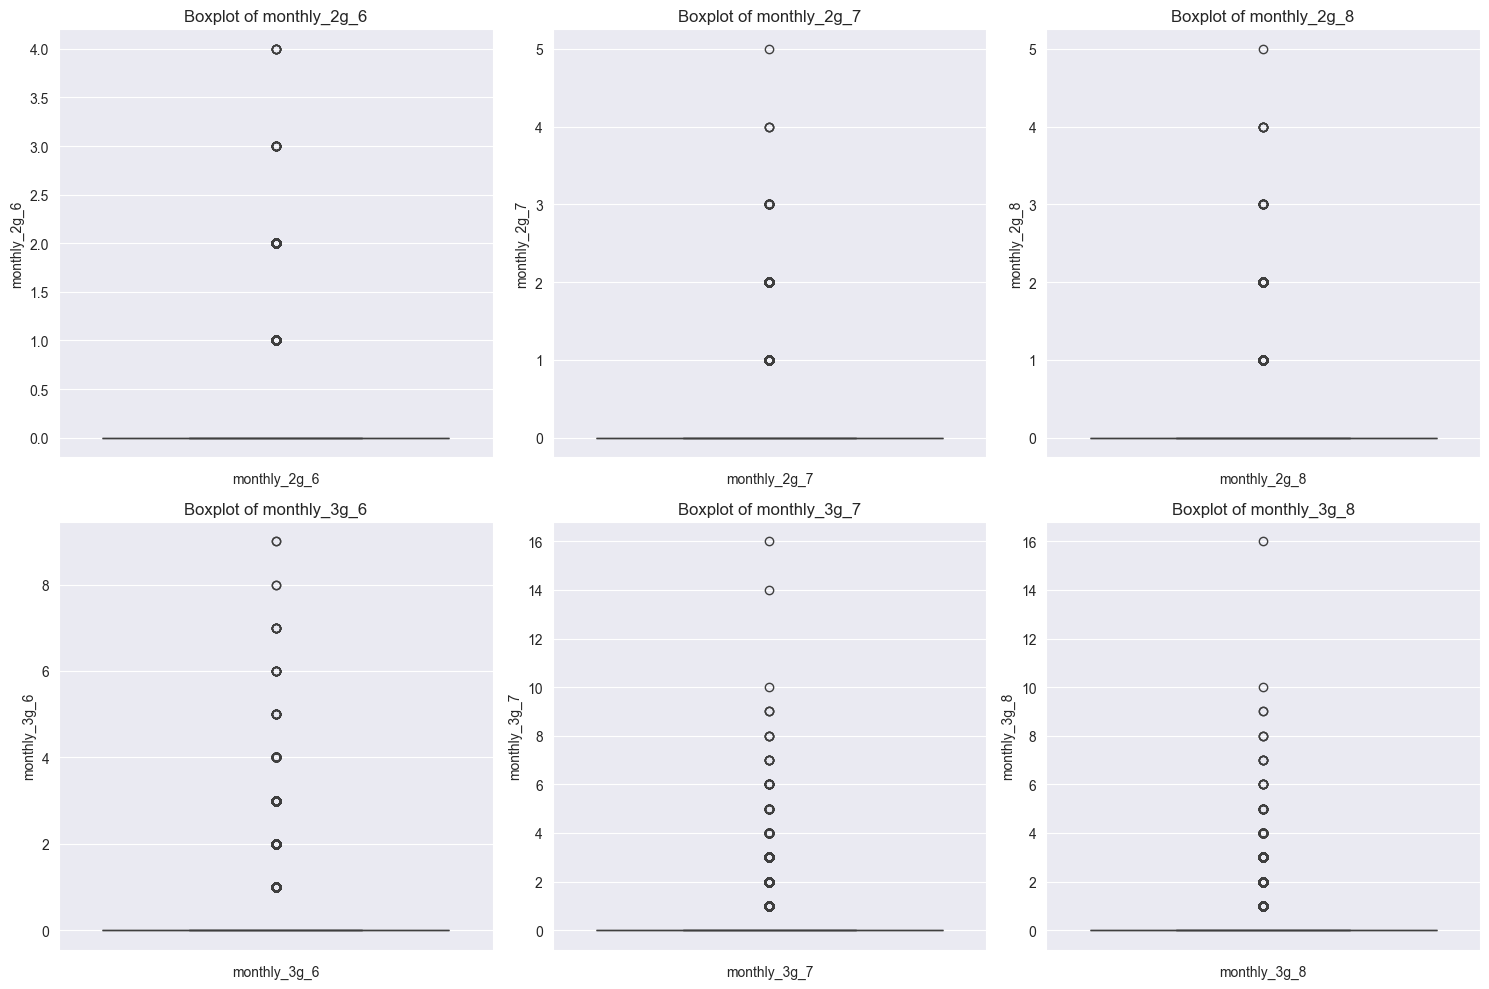

In [101]:
plot_boxplots(high_val_customers, "monthly")

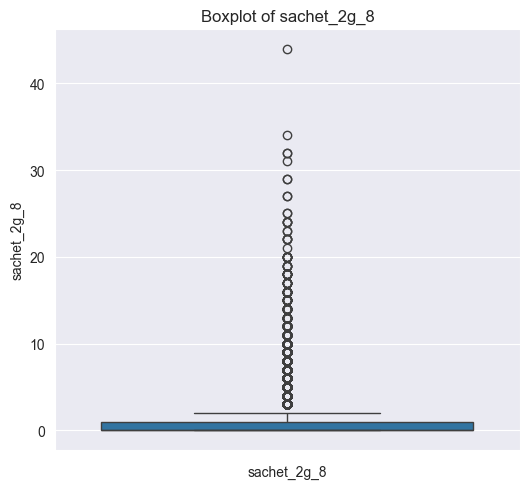

In [102]:
# Service schemes with validity smaller than a month 
plot_boxplots(high_val_customers, "sachet")

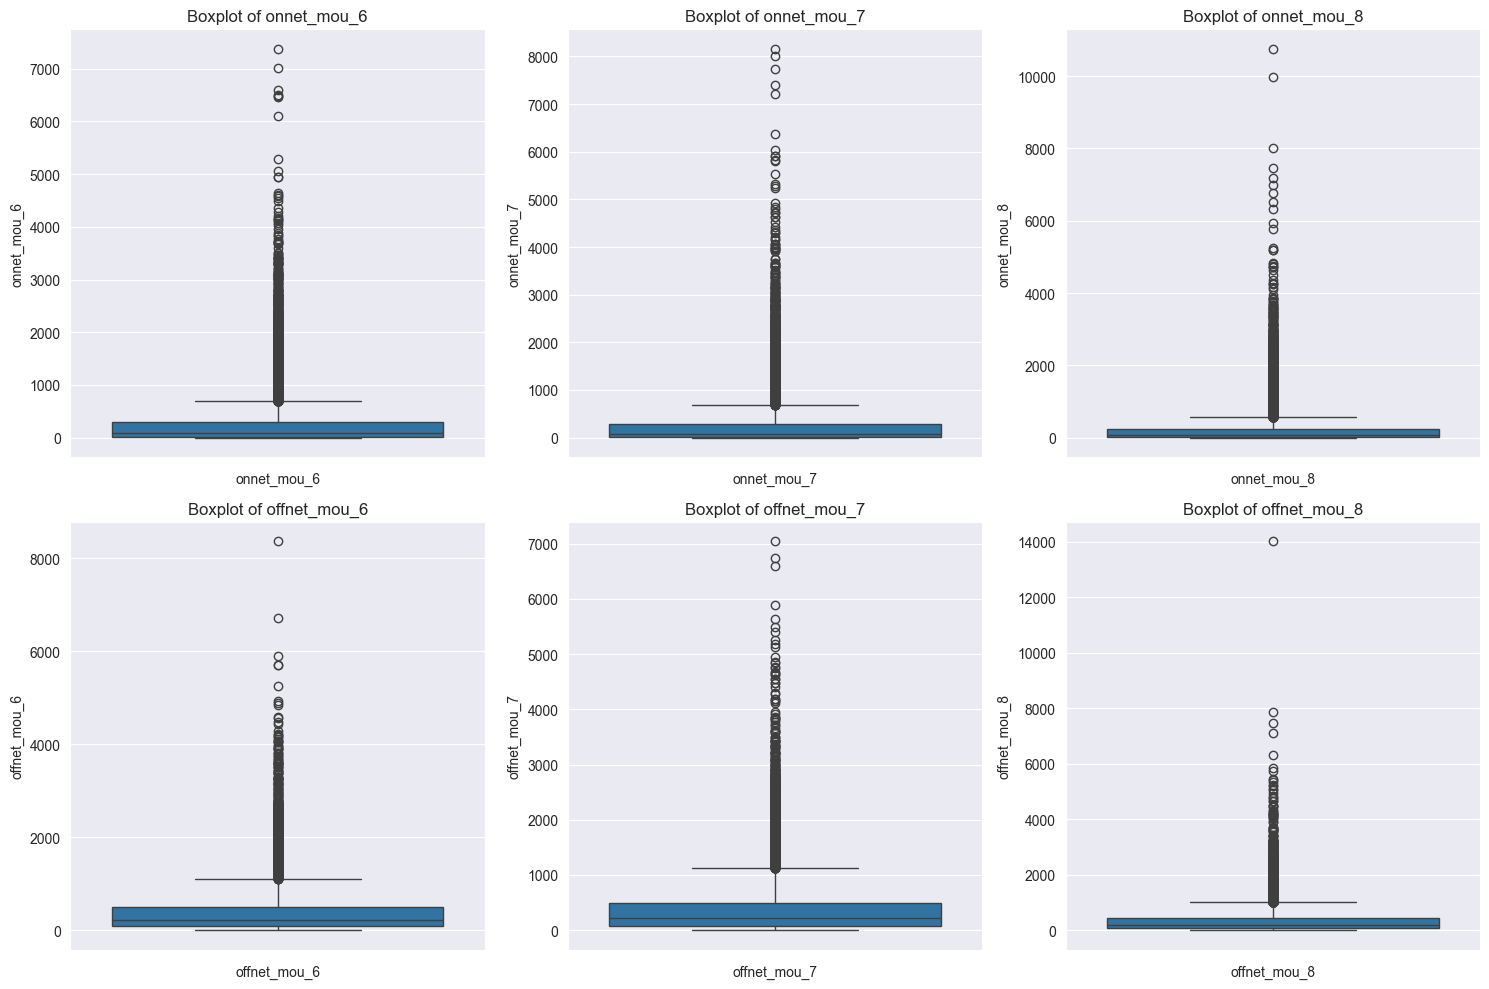

In [103]:
# All kind of calls within the same operator network - ONNET
# All kind of calls outside the operator T network - OFFNET 
plot_boxplots(high_val_customers, "net")

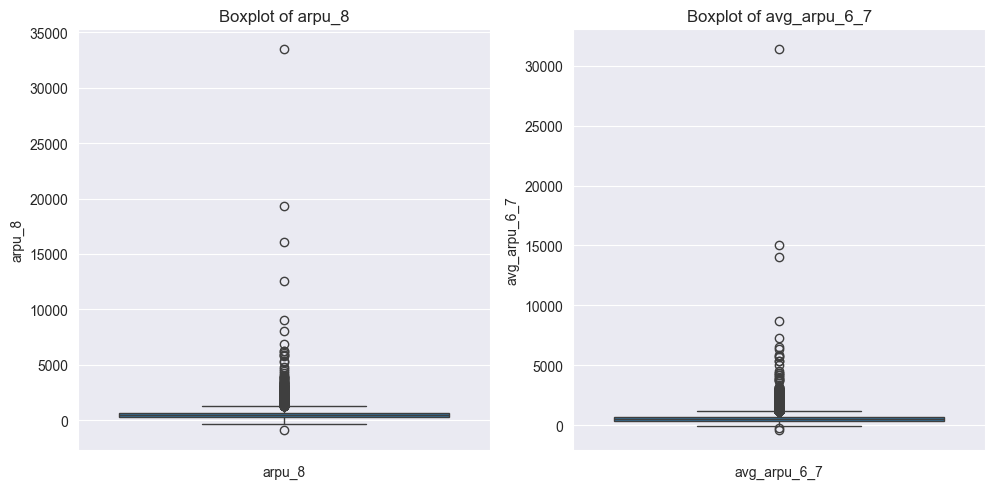

In [104]:
plot_boxplots(high_val_customers, "arpu")

In [105]:
def plot_categorical_columns(data, columns, exclude_columns=None, plots_per_row=2):
    if exclude_columns is None:
        exclude_columns = []
    
    filtered_columns = [col for col in columns if col not in exclude_columns]
    
    num_plots = len(filtered_columns)
    num_rows = (num_plots + plots_per_row - 1) // plots_per_row  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for idx, col in enumerate(filtered_columns):
        sns.countplot(data[col], palette="tab10", ax=axes[idx])
        axes[idx].set_title(f'Target variable in {col}')
        axes[idx].set_xlabel(col)
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
    # Hide any unused subplots
    for idx in range(num_plots, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

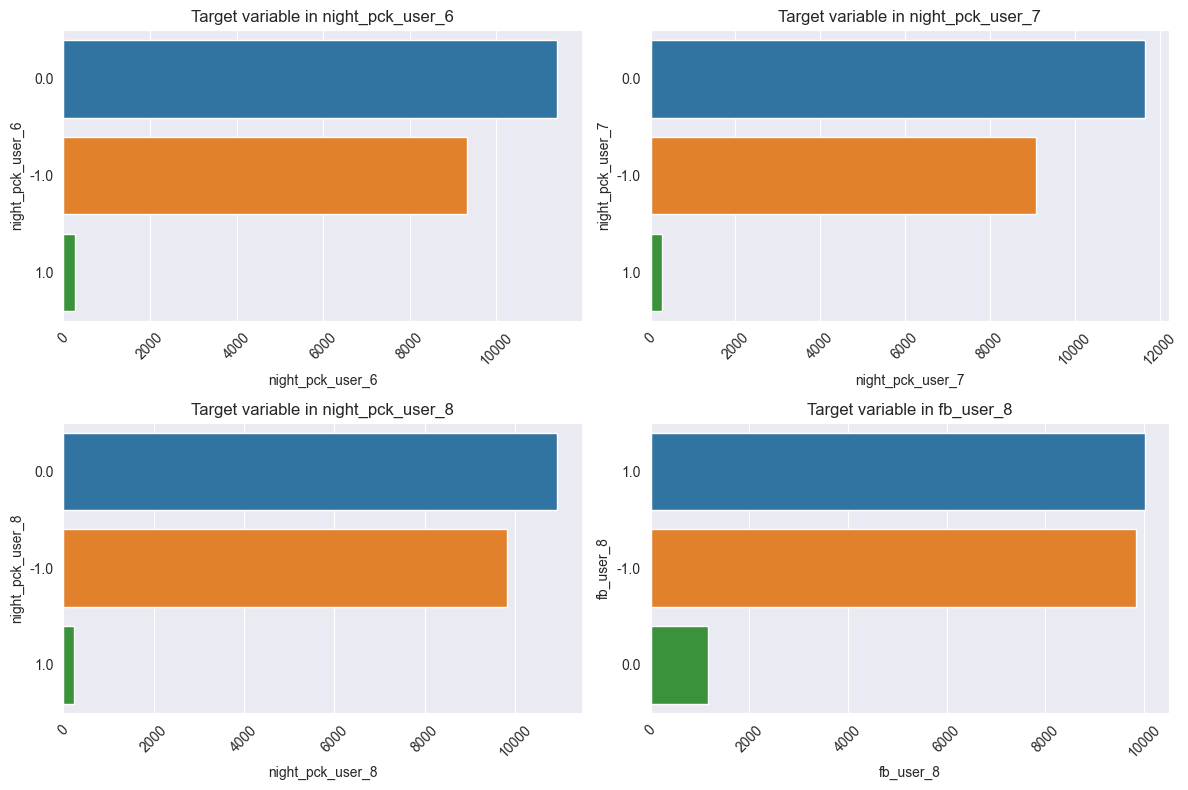

In [106]:
exclude_columns = ['fb_user_6','fb_user_7']
plot_categorical_columns(high_val_customers, categorical_columns, exclude_columns)

In [107]:
pd.crosstab(high_val_customers.churn_probability, high_val_customers.night_pck_user_7, normalize='columns')*100

night_pck_user_7,-1.0,0.0,1.0
churn_probability,,,
0,88.299978,94.349506,93.79562
1,11.700022,5.650494,6.20438


In [108]:
# Observing the correlation among these numerical predictor variables

high_val_customers.drop('id',axis=1).corr()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_tenure_months,avg_arpu_6_7
arpu_8,1.000000,0.145248,0.222366,0.332629,0.274792,0.370073,0.507387,0.268283,0.309388,4.952236e-01,...,0.078797,0.116142,0.216977,0.011244,0.137819,0.079734,0.066713,-0.156638,0.069281,0.767687
onnet_mou_6,0.145248,1.000000,0.746427,0.627422,0.089449,0.038770,0.036761,0.526232,0.042679,-1.378236e-02,...,-0.083916,-0.088845,-0.083198,-0.221177,-0.103551,-0.109909,-0.098105,0.079309,-0.044811,0.294521
onnet_mou_7,0.222366,0.746427,1.000000,0.806500,0.053773,0.081032,0.070150,0.695407,0.074067,-1.101905e-02,...,-0.087779,-0.083877,-0.080865,-0.203270,-0.099484,-0.104063,-0.101630,0.024796,-0.048771,0.287436
onnet_mou_8,0.332629,0.627422,0.806500,1.000000,0.065988,0.089420,0.125968,0.858635,0.108918,-1.079254e-02,...,-0.075713,-0.066682,-0.059745,-0.151668,-0.075064,-0.083802,-0.077422,-0.066019,-0.022523,0.248421
offnet_mou_6,0.274792,0.089449,0.053773,0.065988,1.000000,0.738694,0.578307,0.026506,0.462614,8.781762e-02,...,-0.086572,-0.087890,-0.068981,-0.236383,-0.092919,-0.104488,-0.088538,0.056567,0.002115,0.456712
offnet_mou_7,0.370073,0.038770,0.081032,0.089420,0.738694,1.000000,0.764455,0.064574,0.656049,8.709349e-02,...,-0.096280,-0.082238,-0.067691,-0.229935,-0.095828,-0.108378,-0.104115,-0.003004,-0.013098,0.443711
offnet_mou_8,0.507387,0.036761,0.070150,0.125968,0.578307,0.764455,1.000000,0.086749,0.855066,9.781539e-02,...,-0.074126,-0.059634,-0.034574,-0.168114,-0.062268,-0.079657,-0.076995,-0.110134,0.013598,0.363290
std_og_t2t_mou_8,0.268283,0.526232,0.695407,0.858635,0.026506,0.064574,0.086749,1.000000,0.133527,-1.161131e-02,...,-0.081997,-0.076105,-0.073807,-0.162906,-0.090278,-0.097588,-0.093968,-0.045820,-0.073648,0.192351
std_og_t2m_mou_8,0.309388,0.042679,0.074067,0.108918,0.462614,0.656049,0.855066,0.133527,1.000000,-1.108808e-02,...,-0.081322,-0.072032,-0.063007,-0.157250,-0.084397,-0.091641,-0.090547,-0.060567,-0.095978,0.193205
isd_og_mou_8,0.495224,-0.013782,-0.011019,-0.010793,0.087818,0.087093,0.097815,-0.011611,-0.011088,1.000000e+00,...,0.003304,-0.000598,0.004005,-0.012061,0.006542,-0.001035,-0.004502,-0.004245,-0.005953,0.519146


In [109]:
# building a correlation matrix using the data provided
corrmat = np.corrcoef(high_val_customers.drop('id',axis=1).corr().transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.998 , min negative corr:  -0.867


In [110]:
high_val_customers.shape

(21013, 56)

In [111]:
high_val_customers.head()

,id,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_tenure_months,avg_arpu_6_7
4,4,101.565,21.28,4.83,6.13,56.99,38.11,9.63,0.0,0.00,...,0,0,0,1.0,0.0,0.00,0.00,0,22.0,184.4495
15,15,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.00,...,0,0,0,1.0,0.0,0.00,0.00,0,20.0,478.9215
23,23,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.00,...,0,0,0,-1.0,0.0,0.00,0.00,0,15.0,1018.2270
24,24,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,121.79,...,0,0,0,0.0,0.0,0.00,0.00,0,41.0,362.0215
27,27,421.300,8.58,11.48,12.68,133.16,158.73,182.83,0.0,0.00,...,0,0,1,1.0,700.4,185.71,173.72,0,19.0,370.7370


In [112]:
categorical_columns = high_val_customers.select_dtypes(include='object').columns.tolist()

In [113]:
categorical_columns

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_8']

In [114]:
for col in categorical_columns:
    high_val_customers[col] = pd.to_numeric(high_val_customers[col], errors='coerce')

In [115]:
#Creting backup variable. 
high_logreg = high_val_customers.copy()
#changing churn column to numeric
high_logreg.churn= high_logreg.churn_probability.astype("int")

In [116]:
high_logreg.head()

,id,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_tenure_months,avg_arpu_6_7
4,4,101.565,21.28,4.83,6.13,56.99,38.11,9.63,0.0,0.00,...,0,0,0,1.0,0.0,0.00,0.00,0,22.0,184.4495
15,15,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.00,...,0,0,0,1.0,0.0,0.00,0.00,0,20.0,478.9215
23,23,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.00,...,0,0,0,-1.0,0.0,0.00,0.00,0,15.0,1018.2270
24,24,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,121.79,...,0,0,0,0.0,0.0,0.00,0.00,0,41.0,362.0215
27,27,421.300,8.58,11.48,12.68,133.16,158.73,182.83,0.0,0.00,...,0,0,1,1.0,700.4,185.71,173.72,0,19.0,370.7370


In [117]:
high_logreg.dtypes.value_counts()

float64    38
int64      18
Name: count, dtype: int64

### Split Data Into Train and Test Data

In [118]:
# Putting response variable to y
y = high_logreg.pop('churn_probability')

# Putting feature variables to X
X = high_logreg.drop('id',axis=1)

### We got our X and y now. 

In [119]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (21013, 54)
Size of response variable dataset is: (21013,)


# Train Test Split 

In [120]:
# Split data into train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [121]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14709, 54), (6304, 54), (14709,), (6304,))

In [122]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_tenure_months,avg_arpu_6_7
3359,251.342,0.00,2.70,0.00,42.71,64.06,100.66,0.00,0.00,0.00,...,0,0,0,0,1.0,0.00,0.00,0.00,80.0,285.4050
26847,972.555,357.96,106.56,161.73,670.46,1231.79,1479.76,102.43,318.46,0.00,...,0,0,0,0,-1.0,0.00,0.00,0.00,14.0,738.5385
54612,812.991,748.03,309.38,566.21,905.11,598.06,727.38,0.00,0.00,0.00,...,0,0,0,0,-1.0,516.08,103.11,134.23,20.0,701.2885
40490,310.670,148.89,22.09,82.74,312.21,96.81,182.19,0.00,2.18,5.23,...,0,2,2,0,1.0,497.67,916.20,1247.46,23.0,418.0650
34595,250.036,31.93,0.00,2.09,3.01,15.16,42.13,0.00,31.83,0.00,...,0,0,4,0,1.0,0.00,1044.28,0.00,11.0,474.4140


In [123]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [124]:
len(num_col)

54

#### Applying StandardScaler before PCA

In [125]:
# ## Scaling the train and test data
# scale = StandardScaler()
# X_train[num_col] = scale.fit_transform(X_train[num_col])
# X_test[num_col] = scale.fit_transform(X_test[num_col])
# X_train.head()

In [126]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.fit_transform(X_test[num_col])

# Model building and PCA 

In [127]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)

In [128]:
#Performing PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [129]:
# Let us observe pricipal components created
print("The Principal components are:")
pca.components_

The Principal components are:


array([[ 1.00926976e-01,  1.43483224e-01,  1.60107082e-01, ...,
        -1.56967023e-01, -1.30472812e-02,  1.17374607e-01],
       [ 2.87215752e-01,  8.23534079e-02,  1.06565264e-01, ...,
         1.40017312e-01,  2.87903904e-02,  2.77349305e-01],
       [ 6.59116960e-02,  5.19570230e-02,  9.50650534e-02, ...,
        -3.97786618e-02, -9.83983916e-02, -1.88092581e-02],
       ...,
       [ 2.44732533e-02,  2.10310644e-03, -6.66737796e-03, ...,
        -7.78051478e-03, -4.55972739e-03,  7.55199935e-01],
       [-1.63912521e-02,  2.12775553e-02, -3.47954817e-01, ...,
        -1.52720198e-03, -6.19023375e-03, -1.12646258e-02],
       [-1.66592543e-02,  1.31247754e-04, -3.59820374e-01, ...,
        -3.41563437e-04,  1.14313587e-03,  2.13761296e-02]])

In [130]:
# Let us also look at the variance ratio
var_ratio = np.round((pca.explained_variance_ratio_) * 100,2)
var_ratio

array([1.782e+01, 1.382e+01, 6.670e+00, 5.490e+00, 4.960e+00, 4.760e+00,
       3.520e+00, 3.310e+00, 2.810e+00, 2.440e+00, 2.360e+00, 2.340e+00,
       2.040e+00, 1.950e+00, 1.840e+00, 1.790e+00, 1.740e+00, 1.690e+00,
       1.310e+00, 1.280e+00, 1.220e+00, 1.130e+00, 1.020e+00, 9.700e-01,
       9.200e-01, 9.000e-01, 8.500e-01, 7.800e-01, 7.600e-01, 7.000e-01,
       6.900e-01, 6.200e-01, 5.900e-01, 5.500e-01, 4.700e-01, 4.400e-01,
       4.200e-01, 3.700e-01, 3.400e-01, 3.300e-01, 2.900e-01, 2.500e-01,
       2.500e-01, 2.200e-01, 1.900e-01, 1.800e-01, 1.600e-01, 1.300e-01,
       1.300e-01, 7.000e-02, 6.000e-02, 5.000e-02, 3.000e-02, 1.000e-02])

In [131]:
var_cum = np.cumsum(var_ratio)
var_cum

array([ 17.82,  31.64,  38.31,  43.8 ,  48.76,  53.52,  57.04,  60.35,
        63.16,  65.6 ,  67.96,  70.3 ,  72.34,  74.29,  76.13,  77.92,
        79.66,  81.35,  82.66,  83.94,  85.16,  86.29,  87.31,  88.28,
        89.2 ,  90.1 ,  90.95,  91.73,  92.49,  93.19,  93.88,  94.5 ,
        95.09,  95.64,  96.11,  96.55,  96.97,  97.34,  97.68,  98.01,
        98.3 ,  98.55,  98.8 ,  99.02,  99.21,  99.39,  99.55,  99.68,
        99.81,  99.88,  99.94,  99.99, 100.02, 100.03])

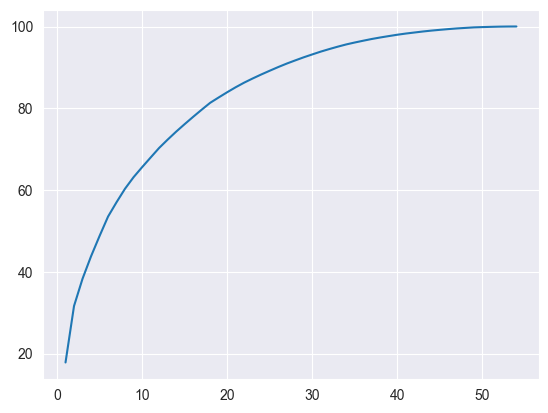

In [132]:
#Scree Plot
plt.plot(range(1,len(var_cum)+1),var_cum)

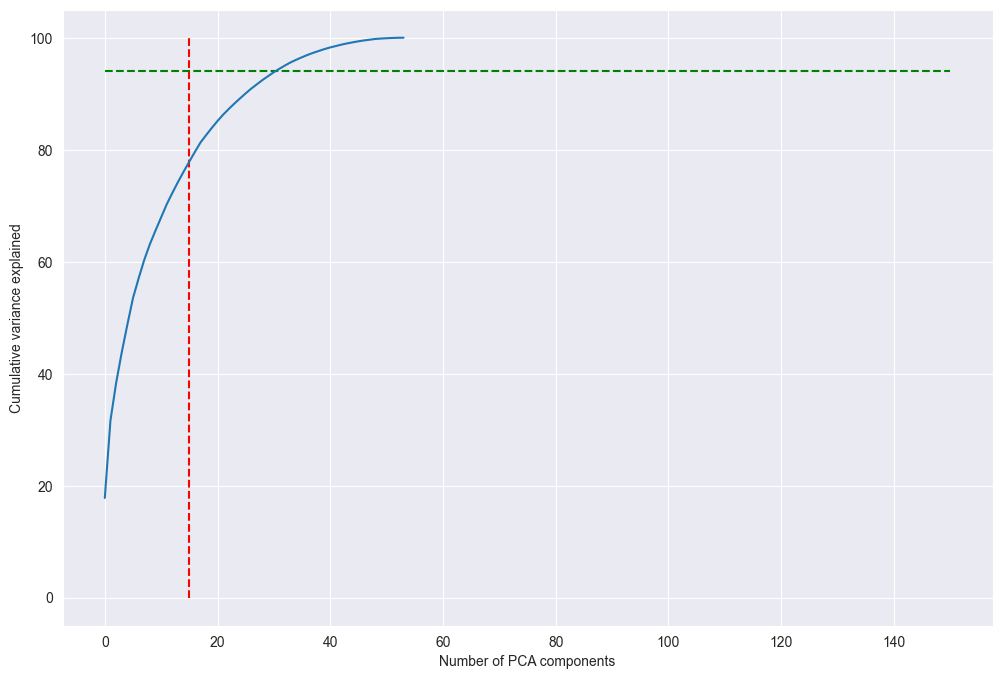

In [133]:
#Making a scree plot for the explained variance
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=94, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.xlabel('Number of PCA components')
plt.ylabel("Cumulative variance explained")
plt.show()

#### Adopting Incremental PCA

In [134]:
#Due to Size of the large data. Using IncrementalPCA.
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 9)

X_train_pca = pca_final.fit_transform(X_train)

In [135]:
print("Size of earlier dataset:",X_train.shape)
print("Size of dataset after PCA:", X_train_pca.shape)

Size of earlier dataset: (14709, 54)
Size of dataset after PCA: (14709, 9)


In [136]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.044 , min negative corr:  -0.049


In [137]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(6304, 9)

In [138]:
var_ratio = np.round((pca_final.explained_variance_ratio_) * 100,2)
var_ratio

array([17.81, 13.81,  6.66,  5.46,  4.95,  3.88,  3.31,  3.21,  1.89])

In [139]:
var_cum = np.cumsum(var_ratio)
var_cum

array([17.81, 31.62, 38.28, 43.74, 48.69, 52.57, 55.88, 59.09, 60.98])

Model Building

### Model 1.1 - PCA and Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model.
# default solver is very slow so changed to 'lbfgs'
lr = LogisticRegression()

In [141]:
X_train_pca.shape, y_train.shape

((14709, 9), (14709,))

In [142]:
# Training the model on the data
model_lr_pca = lr.fit(X_train_pca, y_train)

In [143]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    # Predictions for Train and Test datasets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    y_train_proba = classifier.predict_proba(X_train)[:, 1]
    y_test_proba = classifier.predict_proba(X_test)[:, 1]

    # Train Metrics
    print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
    print("Train Sensitivity (Recall for True Class) :", recall_score(y_train, y_train_pred))
    print("Train Specificity :", specificity(y_train, y_train_pred))
    print("Train False Positive Rate :", false_positive_rate(y_train, y_train_pred))
    print("Train True Negative Rate :", true_negative_rate(y_train, y_train_pred))
    print("Train F1 Score :", f1_score(y_train, y_train_pred))
    print("Train AUC :", roc_auc_score(y_train, y_train_proba))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("-"*50)
    
    # Test Metrics
    print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
    print("Test Sensitivity (Recall for True Class) :", recall_score(y_test, y_test_pred))
    print("Test Specificity :", specificity(y_test, y_test_pred))
    print("Test False Positive Rate :", false_positive_rate(y_test, y_test_pred))
    print("Test True Negative Rate :", true_negative_rate(y_test, y_test_pred))
    print("Test F1 Score :", f1_score(y_test, y_test_pred))
    print("Test AUC :", roc_auc_score(y_test, y_test_proba))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))

def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def false_positive_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (tn + fp)

def true_negative_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [145]:
evaluate_model(model_lr_pca,X_train_pca, y_train, X_test_pca, y_test)

Train Accuracy : 0.920932762254402
Train Sensitivity (Recall for True Class) : 0.11750205423171733
Train Specificity : 0.9934034983694041
Train False Positive Rate : 0.006596501630595909
Train True Negative Rate : 0.9934034983694041
Train F1 Score : 0.1973775017253278
Train AUC : 0.830397562352297
Train Confusion Matrix:
[[13403    89]
 [ 1074   143]]
--------------------------------------------------
Test Accuracy : 0.9217956852791879
Test Sensitivity (Recall for True Class) : 0.08812260536398467
Test Specificity : 0.9970598408855067
Test False Positive Rate : 0.002940159114493255
Test True Negative Rate : 0.9970598408855067
Test F1 Score : 0.15726495726495726
Test AUC : 0.809369413068169
Test Confusion Matrix:
[[5765   17]
 [ 476   46]]


### Model Performance Summary



| Metric                           | Train Value | Test Value |
|----------------------------------|-------------|------------|
| **Accuracy**                     | 92.09%      | 92.34%     |
| **Sensitivity (Recall for True Class)** | 7.56%       | 14.37%     |
| **Specificity**                  | 99.72%      | 99.38%     |
| **False Positive Rate**          | 0.28%       | 0.62%      |
| **True Negative Rate**           | 99.72%      | 99.38%     |
| **F1 Score**                     | 13.66%      | 23.70%     |
| **AUC**                          | 86.30%      | 83.56%     |




### Conclusion:

- **Strengths**: High specificity and accuracy; strong AUC scores indicating good model discriminative ability.
- **Weaknesses**: Low sensitivity and F1 scores; the model misses many churn cases.


### 1.2 Model - Hyper Parameter tuning - Logistic Regression with PCA

In [146]:
from sklearn.model_selection import StratifiedKFold

logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced")
penalty = ['l1', 'l2','elasticnet']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(penalty=penalty,
                  C=C)

# #creating 5 folds - Cross validation Step. 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#GradientSearchCV
logreg_model =  GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',  # This is specially useful for Imbalance dataset. 
                    cv = folds,
                    verbose=1, # see updates on the progress of the grid search in your console.
                    n_jobs=-1) # This allows parallel execution, utilizing all available CPU cores to speed up the grid search process.

In [147]:
#model fitting
logreg_model.fit(X_train_pca,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [148]:
# cross validation results
pd.DataFrame(logreg_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002733,0.003405,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.007904,0.003357,0.002399,0.001416,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.803809,0.819275,0.844191,0.810944,0.833254,0.822295,0.014692,8
2,0.002512,0.001853,0.000000,0.000000,0.0001,elasticnet,"{'C': 0.0001, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.001288,0.000810,0.000000,0.000000,0.0010,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,0.007719,0.001699,0.001254,0.000174,0.0010,l2,"{'C': 0.001, 'penalty': 'l2'}",0.812421,0.824148,0.848634,0.811933,0.842294,0.827886,0.015138,7


In [149]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.8281023020902489
Best hyperparameters:  {'C': 10, 'penalty': 'l2'}


In [150]:
#fitting the model with best parameters
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced", C = logreg_model.best_params_['C'],penalty=logreg_model.best_params_['penalty'])
logreg_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [151]:
evaluate_model(logreg_model,X_train_pca, y_train, X_test_pca, y_test)

Train Accuracy : 0.7428105241688762
Train Sensitivity (Recall for True Class) : 0.7608874281018899
Train Specificity : 0.7411799584939224
Train False Positive Rate : 0.2588200415060777
Train True Negative Rate : 0.7411799584939224
Train F1 Score : 0.32866015971606033
Train AUC : 0.8307992124612753
Train Confusion Matrix:
[[10000  3492]
 [  291   926]]
--------------------------------------------------
Test Accuracy : 0.7388959390862944
Test Sensitivity (Recall for True Class) : 0.7471264367816092
Test Specificity : 0.7381528882739536
Test False Positive Rate : 0.26184711172604636
Test True Negative Rate : 0.7381528882739536
Test F1 Score : 0.3215169002473207
Test AUC : 0.8096245316751287
Test Confusion Matrix:
[[4268 1514]
 [ 132  390]]


### Model Evaluation Summary


| Metric                           | Train Value | Test Value |
|----------------------------------|-------------|------------|
| **Specificity**                  | 77.83%      | 73.54%     |
| **False Positive Rate**          | 22.17%      | 26.46%     |
| **True Negative Rate**           | 77.83%      | 73.54%     |
| **F1 Score**                     | 37.90%      | 33.98%     |
| **AUC**                          | 87.31%      | 84.56%     |




### Conclusion:

- **Strengths**: The model demonstrates high AUC, indicating good discriminatory power. Sensitivity on the test set is strong, capturing most churn cases.
- **Weaknesses**: The specificity is relatively lower, leading to more false positives. F1 score is low, highlighting the trade-off between precision and recall.


### 2.1 Decision Tree with PCA

In [152]:
from sklearn.tree import DecisionTreeClassifier


In [153]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [154]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [155]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [156]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=decision_tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [157]:
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [158]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032560,0.005639,0.000680,0.000026,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917074,0.915964,0.917324,0.917324,0.916922,0.000562,48
1,0.023588,0.003580,0.000638,0.000015,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917074,0.915964,0.917324,0.917324,0.916922,0.000562,48
2,0.028916,0.002956,0.000574,0.000020,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917074,0.915964,0.917324,0.917324,0.916922,0.000562,48
3,0.021572,0.001238,0.000605,0.000025,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.917074,0.915964,0.917324,0.917324,0.916922,0.000562,48
4,0.022819,0.003103,0.000583,0.000049,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.917074,0.915964,0.917324,0.917324,0.916922,0.000562,48


In [159]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
51,0.152428,0.024933,0.000739,0.000059,10,20,50,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",0.915715,0.916508,0.922763,0.924667,0.919913,0.003871,1
53,0.149312,0.008591,0.002843,0.003552,10,20,50,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",0.915715,0.916508,0.922763,0.924667,0.919913,0.003871,1
54,0.141919,0.010115,0.001323,0.000991,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.914356,0.916236,0.925755,0.921675,0.919505,0.004499,3
56,0.138177,0.017576,0.001812,0.001141,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.914356,0.916236,0.925755,0.921675,0.919505,0.004499,3
69,0.139895,0.027149,0.000767,0.000023,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.914356,0.916236,0.925755,0.921675,0.919505,0.004499,3


In [160]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [161]:
dt_best_model = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

In [162]:
dt_best_model.fit(X_train_pca, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [163]:
evaluate_model(dt_best_model,X_train_pca, y_train, X_test_pca, y_test)

Train Accuracy : 0.9278672921340676
Train Sensitivity (Recall for True Class) : 0.2612982744453574
Train Specificity : 0.9879928846723984
Train False Positive Rate : 0.012007115327601542
Train True Negative Rate : 0.9879928846723984
Train F1 Score : 0.37477902180318207
Train AUC : 0.9076880763937898
Train Confusion Matrix:
[[13330   162]
 [  899   318]]
--------------------------------------------------
Test Accuracy : 0.9195748730964467
Test Sensitivity (Recall for True Class) : 0.12260536398467432
Test Specificity : 0.9915254237288136
Test False Positive Rate : 0.00847457627118644
Test True Negative Rate : 0.9915254237288136
Test F1 Score : 0.2015748031496063
Test AUC : 0.7786647290905453
Test Confusion Matrix:
[[5733   49]
 [ 458   64]]


### Model Evaluation Summary

#### Metrics Comparison

| Metric                           | Train Value | Test Value |
|----------------------------------|-------------|------------|
| **Accuracy**                     | 93.13%      | 91.43%     |
| **Sensitivity (Recall for True Class)** | 33.11%      | 25.86%     |
| **Specificity**                  | 98.55%      | 97.35%     |
| **False Positive Rate**          | 1.45%       | 2.65%      |
| **True Negative Rate**           | 98.55%      | 97.35%     |
| **F1 Score**                     | 44.38%      | 33.33%     |
| **AUC**                          | 92.44%      | 80.64%     |

### Conclusion:

- **Strengths**: High specificity and low false positive rate show that the model correctly identifies non-churn customers.
- **Weaknesses**: Low sensitivity indicates that the model struggles to capture a significant portion of actual churn cases, which leads to a lower F1 score and recall.
- **AUC**: A reasonable AUC indicates that the model has a good balance between precision and recall but can be improved for better churn detection.


### Model 2.3 - PCA and Random Forest

In [164]:
X_train_pca.shape, y_train.shape

((14709, 9), (14709,))

In [165]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=15, random_state=100, oob_score=True)

In [166]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=4, max_features=15, oob_score=True,
                       random_state=100)

In [167]:
rfc.oob_score_

0.9211367190155687

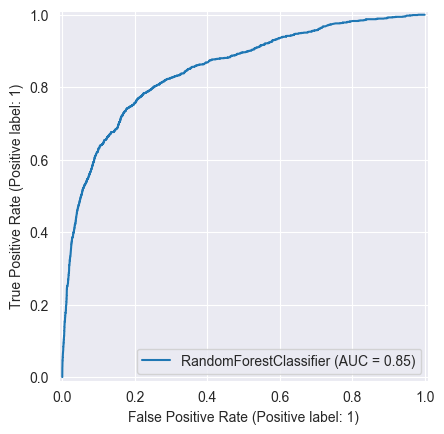

In [168]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rfc, X_train_pca, y_train)
plt.show()

In [169]:
evaluate_model(rfc,X_train_pca, y_train, X_test_pca, y_test)

Train Accuracy : 0.9234482289754572
Train Sensitivity (Recall for True Class) : 0.1791290057518488
Train Specificity : 0.9905870145271272
Train False Positive Rate : 0.009412985472872814
Train True Negative Rate : 0.9905870145271272
Train F1 Score : 0.2791293213828425
Train AUC : 0.8484892352898616
Train Confusion Matrix:
[[13365   127]
 [  999   218]]
--------------------------------------------------
Test Accuracy : 0.9200507614213198
Test Sensitivity (Recall for True Class) : 0.11877394636015326
Test Specificity : 0.9923901764095469
Test False Positive Rate : 0.007609823590453131
Test True Negative Rate : 0.9923901764095469
Test F1 Score : 0.19745222929936307
Test AUC : 0.7954412624196376
Test Confusion Matrix:
[[5738   44]
 [ 460   62]]


#### Metrics Comparison:

| Metric                           | Train Value | Test Value |
|----------------------------------|-------------|------------|
| **Accuracy**                     | 91.73%      | 91.72%     |
| **Sensitivity (Recall for True Class)** | 0.00%       | 0.00%      |
| **Specificity**                  | 100.00%     | 100.00%    |
| **False Positive Rate**          | 0.00%       | 0.00%      |
| **True Negative Rate**           | 100.00%     | 100.00%    |
| **F1 Score**                     | 0.00%       | 0.00%      |
| **AUC**                          | 87.11%      | 82.57%     |

#### Confusion Matrix:

**Train Confusion Matrix:**

|                  | Predicted Negative | Predicted Positive |
|------------------|--------------------|--------------------|
| Actual Negative  | 13,492             | 0                  |
| Actual Positive  | 1,217              | 0                  |

**Test Confusion Matrix:**

|                  | Predicted Negative | Predicted Positive |
|------------------|--------------------|--------------------|
| Actual Negative  | 5,782              | 0                  |
| Actual Positive  | 522                | 0                  |


### 2.3 Hyperparameter tuning with Random Forest 

In [170]:
rfc_hyper = RandomForestClassifier(random_state=42, n_jobs=-1)

In [171]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [172]:
rfc_grid_search = GridSearchCV(estimator=rfc_hyper,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [173]:
rfc_grid_search.fit(X_train_pca, y_train)


Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [174]:
rfc_grid_search.best_score_

np.float64(0.9217487407207599)

In [175]:
rfc_grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [176]:
rfc_hyper_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [177]:
rfc_hyper_model.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [178]:
evaluate_model(rfc_hyper_model,X_train_pca,y_train,X_test_pca,y_test)

Train Accuracy : 0.9235842001495683
Train Sensitivity (Recall for True Class) : 0.12736236647493837
Train Specificity : 0.9954046842573376
Train False Positive Rate : 0.004595315742662319
Train True Negative Rate : 0.9954046842573376
Train F1 Score : 0.21617852161785217
Train AUC : 0.8712037517713409
Train Confusion Matrix:
[[13430    62]
 [ 1062   155]]
--------------------------------------------------
Test Accuracy : 0.919257614213198
Test Sensitivity (Recall for True Class) : 0.05555555555555555
Test Specificity : 0.9972327914216534
Test False Positive Rate : 0.002767208578346593
Test True Negative Rate : 0.9972327914216534
Test F1 Score : 0.10229276895943562
Test AUC : 0.8200628585741719
Test Confusion Matrix:
[[5766   16]
 [ 493   29]]


| Metric                       | Train Set Value   | Test Set Value    |
|-------------------------------|------------------|------------------|
| **Accuracy**                  | 91.88%           | 91.89%           |
| **Sensitivity (Recall for True Class)** | 2.63%            | 2.68%            |
| **Specificity**               | 99.93%           | 99.95%           |
| **False Positive Rate**       | 0.07%            | 0.05%            |
| **True Negative Rate**        | 99.93%           | 99.95%           |
| **F1 Score**                  | 0.05             | 0.05             |
| **AUC**                       | 0.89             | 0.84             |

### Conclusion:
- The model performs well in identifying non-churners but performs poorly at predicting actual churners, primarily due to significant class imbalance.
- **Actionable Step**: To improve churn prediction, techniques like **oversampling** the minority class (churners), **undersampling** the majority class (non-churners), or applying **penalization methods** should be considered.


## Overall comparision from all the result. We can infer Randomforest is the best model with 91% accuracy 

In [179]:
#Train gradient boosting with default parameters
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier(random_state=42,min_samples_leaf=4,min_samples_split=5)

In [180]:
# n_estimators=110,min_samples_leaf=2,min_samples_split=3,learning_rate=0.2
gb_class.fit(X_train_pca,y_train)

GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=5,
                           random_state=42)

In [181]:
#get the predicated label
y_pred_gb = gb_class.predict(X_test_pca)
#get the predicted probability
pred_prob = gb_class.predict_proba(X_test_pca)

In [182]:
evaluate_model(gb_class,X_train_pca,y_train,X_test_pca,y_test)

Train Accuracy : 0.9343939084913998
Train Sensitivity (Recall for True Class) : 0.3541495480690222
Train Specificity : 0.9867328787429588
Train False Positive Rate : 0.01326712125704121
Train True Negative Rate : 0.9867328787429588
Train F1 Score : 0.47181171319102355
Train AUC : 0.8973859490306925
Train Confusion Matrix:
[[13313   179]
 [  786   431]]
--------------------------------------------------
Test Accuracy : 0.922747461928934
Test Sensitivity (Recall for True Class) : 0.18199233716475097
Test Specificity : 0.9896229678312003
Test False Positive Rate : 0.010377032168799724
Test True Negative Rate : 0.9896229678312003
Test F1 Score : 0.28064992614475626
Test AUC : 0.819695752838443
Test Confusion Matrix:
[[5722   60]
 [ 427   95]]


In [183]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [184]:
import xgboost as xgb

In [185]:
# Model training with default paamters

xgb_class = xgb.XGBClassifier(max_depth=10)
xgb_class.fit(X_train_pca,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [186]:
#Model prediction 
y_pred_xgb = xgb_class.predict(X_test_pca)
#Model predict probability
pred_prob = xgb_class.predict_proba(X_test_pca)

In [187]:
evaluate_model(xgb_class,X_train_pca,y_train,X_test_pca,y_test)

Train Accuracy : 1.0
Train Sensitivity (Recall for True Class) : 1.0
Train Specificity : 1.0
Train False Positive Rate : 0.0
Train True Negative Rate : 1.0
Train F1 Score : 1.0
Train AUC : 0.9999999999999999
Train Confusion Matrix:
[[13492     0]
 [    0  1217]]
--------------------------------------------------
Test Accuracy : 0.9170368020304569
Test Sensitivity (Recall for True Class) : 0.2260536398467433
Test Specificity : 0.9794188861985472
Test False Positive Rate : 0.020581113801452784
Test True Negative Rate : 0.9794188861985472
Test F1 Score : 0.310935441370224
Test AUC : 0.8043823412864074
Test Confusion Matrix:
[[5663  119]
 [ 404  118]]


In [188]:
unseen_data_backup = unseen.copy()

In [189]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [190]:
unseen.shape

(30000, 171)

In [191]:
unseen.isnull().sum()

id                    0
circle_id             0
loc_og_t2o_mou      316
std_og_t2o_mou      316
loc_ic_t2o_mou      316
                  ...  
fb_user_8         22078
aon                   0
aug_vbc_3g            0
jul_vbc_3g            0
jun_vbc_3g            0
Length: 171, dtype: int64

In [192]:
unseen_id = unseen_data_backup["id"]

In [193]:
unseen_data_backup['aon_tenure_months'] =  (unseen_data_backup['aon']/30).round(0)

In [194]:
unseen_data_backup["avg_arpu_6_7"]= (unseen_data_backup['arpu_6']+unseen_data_backup['arpu_7'])/2

In [195]:
columns_to_select = X.columns

In [196]:
columns_to_select

Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_7', 'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb_user_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'aon_tenure_months',
       'avg_arp

In [197]:
unseen_data_backup[columns_to_select]

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_tenure_months,avg_arpu_6_7
0,64.445,31.78,20.23,23.11,60.16,32.16,34.83,2.05,26.43,0.0,...,0,0,0,0,NaN,0.00,0.00,0.00,56.0,78.6060
1,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,17.68,0.8,...,0,0,0,0,NaN,0.00,0.00,0.00,84.0,464.8680
2,746.239,7.54,7.86,8.40,16.98,45.81,45.04,0.00,0.00,0.0,...,0,0,0,0,NaN,525.61,758.41,241.84,9.0,382.3640
3,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.0,...,0,0,0,0,NaN,0.00,0.00,0.00,41.0,107.4700
4,413.329,450.93,609.03,700.68,60.94,23.84,74.16,686.11,63.18,0.0,...,0,0,0,0,NaN,0.00,0.00,0.00,15.0,356.5715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,406.150,324.46,250.01,285.41,190.36,166.14,221.96,8.16,21.84,0.0,...,0,0,0,0,NaN,3.71,105.64,61.48,42.0,557.5645
29996,374.981,263.79,467.24,650.26,108.53,124.11,189.76,637.09,176.73,0.0,...,0,0,1,0,NaN,0.00,0.00,0.00,75.0,271.1985
29997,180.194,11.08,14.89,19.94,37.24,16.74,45.28,3.26,12.08,0.0,...,0,0,0,0,NaN,0.00,0.00,0.00,15.0,88.8515
29998,257.439,122.74,50.23,26.46,1854.09,1088.83,306.16,26.46,277.39,0.0,...,0,0,0,0,NaN,0.00,0.00,0.00,27.0,952.0165


In [198]:
unseen_test = unseen_data_backup[columns_to_select]

In [199]:
unseen_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_tenure_months,avg_arpu_6_7
0,64.445,31.78,20.23,23.11,60.16,32.16,34.83,2.05,26.43,0.0,...,0,0,0,0,NaN,0.00,0.00,0.00,56.0,78.6060
1,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,17.68,0.8,...,0,0,0,0,NaN,0.00,0.00,0.00,84.0,464.8680
2,746.239,7.54,7.86,8.40,16.98,45.81,45.04,0.00,0.00,0.0,...,0,0,0,0,NaN,525.61,758.41,241.84,9.0,382.3640
3,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.0,...,0,0,0,0,NaN,0.00,0.00,0.00,41.0,107.4700
4,413.329,450.93,609.03,700.68,60.94,23.84,74.16,686.11,63.18,0.0,...,0,0,0,0,NaN,0.00,0.00,0.00,15.0,356.5715


In [200]:
unseen_test.isnull().sum()

arpu_8                   0
onnet_mou_6           1169
onnet_mou_7           1172
onnet_mou_8           1675
offnet_mou_6          1169
offnet_mou_7          1172
offnet_mou_8          1675
std_og_t2t_mou_8      1675
std_og_t2m_mou_8      1675
isd_og_mou_8          1675
og_others_6           1169
og_others_7           1172
og_others_8           1675
total_og_mou_7           0
total_og_mou_8           0
std_ic_mou_8          1675
total_ic_mou_8           0
ic_others_6           1169
ic_others_7           1172
ic_others_8           1675
total_rech_num_6         0
total_rech_num_7         0
total_rech_num_8         0
total_rech_amt_6         0
total_rech_amt_7         0
total_rech_amt_8         0
max_rech_amt_6           0
max_rech_amt_7           0
max_rech_amt_8           0
max_rech_data_6      22415
max_rech_data_7      22294
max_rech_data_8      22078
vol_2g_mb_6              0
vol_2g_mb_7              0
vol_2g_mb_8              0
vol_3g_mb_6              0
vol_3g_mb_7              0
v

In [201]:
unseen_test = unseen_test.apply(lambda x: x.fillna(0))

In [202]:
unseen_test.isnull().sum()

arpu_8               0
onnet_mou_6          0
onnet_mou_7          0
onnet_mou_8          0
offnet_mou_6         0
offnet_mou_7         0
offnet_mou_8         0
std_og_t2t_mou_8     0
std_og_t2m_mou_8     0
isd_og_mou_8         0
og_others_6          0
og_others_7          0
og_others_8          0
total_og_mou_7       0
total_og_mou_8       0
std_ic_mou_8         0
total_ic_mou_8       0
ic_others_6          0
ic_others_7          0
ic_others_8          0
total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
max_rech_amt_6       0
max_rech_amt_7       0
max_rech_amt_8       0
max_rech_data_6      0
max_rech_data_7      0
max_rech_data_8      0
vol_2g_mb_6          0
vol_2g_mb_7          0
vol_2g_mb_8          0
vol_3g_mb_6          0
vol_3g_mb_7          0
vol_3g_mb_8          0
night_pck_user_6     0
night_pck_user_7     0
night_pck_user_8     0
monthly_2g_6         0
monthly_2g_7         0
monthly_2g_

In [203]:
final_normalized_x_test = pd.DataFrame(scaler.transform(unseen_test[num_col]),columns = unseen_test.columns)

In [204]:
final_normalized_x_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_tenure_months,avg_arpu_6_7
0,-0.681612,-0.503349,-0.508178,-0.447357,-0.673071,-0.723165,-0.667505,-0.368452,-0.340871,-0.049589,...,-0.42397,-0.345542,-0.331489,-0.330386,-0.001629,-0.379096,-0.389148,-0.363705,0.482235,-0.856550
1,-0.234521,-0.410337,-0.465731,-0.454183,0.179470,0.498538,0.123894,-0.373634,-0.364480,-0.034970,...,-0.42397,-0.345542,-0.331489,-0.330386,-0.001629,-0.379096,-0.389148,-0.363705,1.358662,-0.182919
2,0.346731,-0.554907,-0.533205,-0.478064,-0.761952,-0.694885,-0.645067,-0.373634,-0.412184,-0.049589,...,-0.42397,-0.345542,-0.331489,-0.330386,-0.001629,0.811417,1.292555,0.190252,-0.988909,-0.326804
3,-0.742012,-0.559650,-0.544737,-0.495599,-0.714486,-0.365053,-0.691284,-0.373634,-0.412184,-0.049589,...,-0.42397,-0.345542,-0.331489,-0.330386,-0.001629,-0.379096,-0.389148,-0.363705,0.012721,-0.806212
4,-0.155394,0.388169,0.683090,0.967076,-0.671466,-0.740403,-0.581071,1.360757,-0.241714,-0.049589,...,-0.42397,-0.345542,-0.331489,-0.330386,-0.001629,-0.379096,-0.389148,-0.363705,-0.801104,-0.371785


In [205]:
final_normalized_x_test = pca_final.transform(final_normalized_x_test)

In [206]:
final_normalized_x_test

array([[-0.88061082, -3.0620645 , -0.4798728 , ..., -0.45407449,
         0.85221717, -0.23466884],
       [ 0.04096066, -0.97756456, -0.98918177, ..., -0.5301083 ,
         1.16999452, -0.09237916],
       [-1.24216402, -0.3021267 , -1.19389531, ...,  0.28494399,
         1.3970619 , -0.19030293],
       ...,
       [-0.8353549 , -3.008348  , -0.24986721, ..., -0.40986308,
         0.84205963, -0.24263556],
       [ 2.32899363, -0.15886985,  1.64126764, ...,  1.66389549,
        -1.08005388, -0.42703122],
       [-4.49960975,  2.66451108, -0.59090629, ..., -1.12453474,
         0.51005896, -0.26686837]])

In [207]:
probabilities_1 = logreg_model.predict(final_normalized_x_test)

In [208]:
probabilities_2 = rfc.predict(final_normalized_x_test)

In [209]:
probabilities_3 = rfc_hyper_model.predict(final_normalized_x_test)

In [210]:
probabilities_4 = dt_best_model.predict(final_normalized_x_test)

In [211]:
probabilities_5 = model_lr_pca.predict(final_normalized_x_test)

In [212]:
probabilities_6 = gb_class.predict(final_normalized_x_test)

In [213]:
probabilities_7 = xgb_class.predict(final_normalized_x_test)

In [214]:
probabilities_1

array([0, 0, 0, ..., 0, 1, 0])

In [215]:
probabilities_2

array([0, 0, 0, ..., 0, 0, 0])

In [216]:
probabilities_3

array([0, 0, 0, ..., 0, 0, 0])

In [217]:
probabilities_4

array([0, 0, 0, ..., 0, 0, 0])

In [218]:
probabilities_5

array([0, 0, 0, ..., 0, 0, 0])

In [219]:
probabilities_6

array([0, 0, 0, ..., 0, 0, 0])

In [220]:
probabilities_7

array([0, 0, 0, ..., 0, 0, 0])

In [221]:
evaluate_model(logreg_model,X_train_pca, y_train, final_normalized_x_test, probabilities_7)

Train Accuracy : 0.7428105241688762
Train Sensitivity (Recall for True Class) : 0.7608874281018899
Train Specificity : 0.7411799584939224
Train False Positive Rate : 0.2588200415060777
Train True Negative Rate : 0.7411799584939224
Train F1 Score : 0.32866015971606033
Train AUC : 0.8307992124612753
Train Confusion Matrix:
[[10000  3492]
 [  291   926]]
--------------------------------------------------
Test Accuracy : 0.9473333333333334
Test Sensitivity (Recall for True Class) : 0.7530864197530864
Test Specificity : 0.947859219893713
Test False Positive Rate : 0.05214078010628698
Test True Negative Rate : 0.947859219893713
Test F1 Score : 0.07168037602820211
Test AUC : 0.9040743340352283
Test Confusion Matrix:
[[28359  1560]
 [   20    61]]


In [232]:
final_prediction_7 = pd.DataFrame({'id':unseen_id,'churn_probability':probabilities_7})

In [224]:
final_prediction_6 = pd.DataFrame({'id':unseen_id,'churn_probability':probabilities_6})

In [225]:
final_prediction_5 = pd.DataFrame({'id':unseen_id,'churn_probability':probabilities_5})

In [226]:
final_prediction_4 = pd.DataFrame({'id':unseen_id,'churn_probability':probabilities_4})

In [227]:
final_prediction_3 = pd.DataFrame({'id':unseen_id,'churn_probability':probabilities_3})

In [228]:
final_prediction_2 = pd.DataFrame({'id':unseen_id,'churn_probability':probabilities_2})

In [229]:
final_prediction_1 = pd.DataFrame({'id':unseen_id,'churn_probability':probabilities_1})

In [240]:
final_prediction_7.to_csv("submission_Sep_Prob_07.csv",index=False)

In [241]:
final_prediction_6.to_csv("submission_Sep_Prob_06.csv",index=False)

In [242]:
final_prediction_5.to_csv("submission_Sep_Prob_05.csv",index=False)

In [243]:
final_prediction_4.to_csv("submission_Sep_Prob_04.csv",index=False)

In [244]:
final_prediction_3.to_csv("submission_Sep_Prob_03.csv",index=False)

In [245]:
final_prediction_2.to_csv("submission_Sep_Prob_02.csv",index=False)

In [246]:
final_prediction_1.to_csv("submission_Sep_Prob_01.csv",index=False)

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [ ]:
unseen_data_scaled = scaler.transform(unseen_test[num_col])

In [ ]:
unseen_data_scaled.head()

In [ ]:
unseen_data_final =pca_final.transform(unseen_test)

In [ ]:
unseen_data_final.shape

In [ ]:
pred_prob = dt_best_model.predict(unseen_data_final)

In [ ]:
len(unseen_id)

In [ ]:
series_to_add = pd.Series(pred_prob, name='C')

In [ ]:
series_to_add.value_counts()

In [ ]:
final_prediction = pd.DataFrame({'id':unseen_id,'churn_probability':pred_prob})

In [ ]:
final_prediction.to_csv("submission_Sep_08.csv",index=False)

### Interpretable models

In [ ]:
# create a copy of dataset
high_df = high_val_customers.copy()
high_df.head()

In [ ]:
col_2g_6 = ['max_rech_data_6','count_rech_2g_6','vol_2g_mb_6','monthly_2g_6','sachet_2g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that count_rech_2g_6 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [ ]:
high_df.drop('count_rech_2g_6',axis=1,inplace = True)

In [ ]:
col_2g_7 = ['max_rech_data_7','count_rech_2g_7','vol_2g_mb_7','monthly_2g_7','sachet_2g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

In [ ]:
high_df.drop('count_rech_2g_7',axis=1,inplace = True)

In [ ]:
col_3g_6 = ['max_rech_data_6','count_rech_3g_6','vol_3g_mb_6','monthly_3g_6','sachet_3g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

In [ ]:
high_df.drop('count_rech_3g_6',axis=1,inplace = True)

In [ ]:
col_3g_7 = ['max_rech_data_7','count_rech_3g_7','vol_3g_mb_7','monthly_3g_7','sachet_3g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)


In [ ]:
high_df.drop('count_rech_3g_7',axis=1,inplace = True)

In [ ]:
og_col_6 = ['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','total_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','onnet_mou_6','offnet_mou_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

We observe that loc_og_mou_6, std_og_mou_6 tot, l_og_mou_6, onnet_7 & offnet_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [ ]:
high_df.drop(['loc_og_mou_6', 'std_og_mou_6','total_og_mou_6','offnet_mou_6','onnet_mou_6'],axis=1,inplace=True)

In [ ]:
og_col_7 = ['loc_og_mou_7','std_og_mou_7','spl_og_mou_7','total_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_mou_7','onnet_mou_7','offnet_mou_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

In [ ]:
high_df.drop(['loc_og_mou_7', 'std_og_mou_7','total_og_mou_7','onnet_mou_7','offnet_mou_7'],axis=1,inplace=True)

In [ ]:
ic_col_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','total_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

In [ ]:
high_df.drop(['loc_ic_mou_6', 'std_ic_mou_6','total_ic_mou_6'],axis=1,inplace=True)

In [ ]:
ic_col_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','total_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

In [ ]:
high_df.drop(['loc_ic_mou_7', 'std_ic_mou_7','total_ic_mou_7'],axis=1,inplace=True)

In [ ]:
# Let us also drop age_group from our dataset as aon_year & age_group are highly correlated.
high_df.drop('age_group',axis=1,inplace=True)

In [ ]:
# The shape of final dataset

print("The shape of final dataset is :",high_df.shape)

Encoding categorical variables

In [ ]:
# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = high_df.select_dtypes(include=['object'])
df_categorical.drop('churn',axis=1).head()

In [ ]:
from sklearn import preprocessing
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

In [ ]:
# concat df_categorical with original df
high_df = high_df.drop(df_categorical.columns, axis=1)

high_df = pd.concat([high_df, df_categorical], axis=1)
high_df.head()

#### Model Building


### MODEL 1 - Tree Model Regression

In [ ]:
high_tree = high_df.copy()

In [ ]:
# Putting response variable to y
y = high_tree.pop('churn')

# Putting feature variables to X
X = high_tree

In [ ]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

In [ ]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

Decision tree with default parameters

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
dt_default.fit(X_train, y_train)

In [ ]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

In [ ]:
import sklearn.metrics as metrics 

# Plotting AUC curve
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default, drop_intermediate =True)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='DTree Default(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR -False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

Hyperparameter Tuning

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10,1)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="recall",return_train_score=True, n_jobs=-1, 
                    error_score = 'raise',verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)


In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The model perfroms the best at max_depth = 5 and after that the increase in depth drops the accuracy on the test dataset.

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds, 
                   scoring="recall", n_jobs = -1,return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

In [ ]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize = (8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The above plot shows that the accuracy of the model rises as min samples leaf rises. From 0 to 115, there is a sharp rise, and then it kind of flattens out from there.

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(300,450,5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, return_train_score=True,
                    cv=n_folds, verbose=1,
                   scoring="recall",n_jobs=-1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The test accuracy of the model increases as the min_samples_split increases.

##### Grid Search to Find Optimal Hyperparameters
- We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(3,10, 2),
    'min_samples_leaf': range(100, 125, 5),
    'min_samples_split': range(380,400,5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'], class_weight='balanced')
clf_gini.fit(X_train, y_train)

In [ ]:
# accuracy score
clf_gini.score(X_train,y_train)

In [ ]:
# classification metrics

y_pred = clf_gini.predict(X_test)

logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='DTree Optimised(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred))

In [ ]:
# accuracy score on training set

y_train_pred = clf_gini.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

##### INFERENCE

- The Decision Tree model's accuracy on the TEST dataset is 83% and on the train set is 82%, which is respectable.
- The RECALL score is roughly 80% for both Churns and Non-Churns.
- 81% of specificity was attained. - The sensitivity found is 84% We can infer from the metrics above that the above is a good one.

MODEL 2 - Random Forest

In [ ]:
high_rf = high_df.copy()

In [ ]:
# Putting response variable to y
y = high_rf.pop('churn')

# Putting feature variables to X
X = high_rf

In [ ]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

In [ ]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

Default Hyperparameters

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters
rfc = RandomForestClassifier(class_weight = 'balanced',random_state=100,n_jobs = -1)

# fit
rfc.fit(X_train,y_train)

In [ ]:
# Making Predictions
y_pred_default = rfc.predict(X_test)


logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default )
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default )
plt.figure()
plt.plot(fpr, tpr, label='RFC Default (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,y_pred_default))

In [ ]:
# Printing confusion matrix
cm = confusion_matrix(y_test,y_pred_default)
print(cm)

In [ ]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

In [ ]:
print(accuracy_score(y_test,y_pred_default))


Hyperparameter Tuning

In [ ]:
# parameters to build the model on
parameters = {'max_depth': range(2, 15, 1)}

# number of folds
n_folds = 5

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,cv=n_folds, n_jobs=-1,
                   scoring="recall",verbose = 1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()

The test score begins to decline after a certain point when the value of max depth is increased, but the train score continues to rise. The ensemble tries to overfit when we increase the maximum depth. The model performs best when the maximum depth is 5, and accuracy on the test dataset declines as depth increases.

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [10,25,50,75,100]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state = 100,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, verbose=1,scoring="recall",return_train_score = True, 
                  n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure(figsize=(8,8))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_split": range(100,200,10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

In [ ]:
print(rf.best_score_)
print(rf.best_params_)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_leaf": range(1,200,20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

In [ ]:
print(rf.best_score_)
print(rf.best_params_)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

The above plot shows that recall of the model rises as min samples leaf rises. Between 0 and 25, there is a sharp increase seen. By the time min_samples_leaf = 125, the curve becomes flat. So, let's decide that this is the ideal minimal sample size.


In [ ]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [25,50,75]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight = 'balanced',random_state=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs  = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

In [ ]:
print(rf.best_score_)
print(rf.best_params_)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,8,10],
    'min_samples_split': [170,190,200], 'min_samples_leaf': [120,130,140] }

# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,random_state=100,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                              class_weight='balanced')

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test)

# Plotting ROC
logit_roc_auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='RFC optimised (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, predictions),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, predictions),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, predictions),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, predictions))

In [ ]:
# accuracy score on training set

y_train_pred = rfc.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

In [ ]:
print(classification_report(y_test,predictions))


In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

In [ ]:
speci = cm[0,0]/(cm[0,0]+cm[0,1])
sensi = cm[1,1]/(cm[1,0]+cm[1,1])

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

#### INFERENCE

1. The accuracy of the Random Forest Tree model is 85% on the TEST dataset and 82% on the training dataset, which is respectable for a model.
2. Churn scores 78% on the RECALL scale while Non-Churns score around 91%.
3. 91% specificity was attained. - The sensitivity found is 78% We can infer from the numbers above that the aforementioned model performs well.

Because it is more crucial to identify the customers who are most likely to churn than it is to predict accuracy, recall has been selected as the performance indicator in our case study.

In [ ]:
features = clf_gini.feature_importances_
cols = X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns
cols

1. Customers in the telecom sector have access to a variety of service providers and can actively switch from one operator to another. The telecoms business has an average annual churn rate of 15 to 25 percent in this fiercely competitive market.

2. Customer retention is now even more crucial than acquiring new customers because it costs 5–10 times more to do so than to keep an existing customer.

3. We have identified customers who are more likely to churn and the variables that affect high churn in order to manage high value customer churn.

4. From the exploratory analysis, we found that in the Seventh month, which is the action phase, there is a significant decrease in recharge, call usage, and data usage. This is once more clear from the list of critical predictors affecting churn as follows:
    - 'loc_og_t2t_mou_6',
    - 'loc_ic_t2m_mou_6',
    - 'roam_og_mou_6',
    - 'arpu_7',
    - 'loc_ic_t2f_mou_7',
    - 'loc_og_t2t_mou_7',
    - '3g_vbc_6',
    - 'total_amt_7',
    - 'roam_og_mou_7',
    - 'churn_probability'

5. STD and local The features that have the biggest effects on customer churn are minutes of usage (both incoming and outgoing).

6. Outgoing roaming calls made by clients in the 7th month also play key role in indicating churn.

In [ ]:
X_test.head()

In [ ]:
unseen.head()

In [ ]:
imputer_columns =  sum([impute_0, og_call_6, og_loc_6,og_std_6,og_call_7,og_loc_7,og_std_7,ic_call_6,ic_loc_6,ic_std_6,ic_call_7,ic_loc_7,ic_std_7], [])
categorical_columns

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# Custom transformer to add a new column based on logic
class AddNewColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        
        # Add a new column based on custom logic
        round((X['aon']/365),1)
        X['aon_yr'] = round((X['aon']/365),1) 
        age_range = [ 0,  2,  4,  6,  8, 10, 12]
        age_bin = [ 1, 2, 3, 4, 5, 6]
        X['age_group'] = pd.cut(X['aon_yr'], age_range, labels=age_bin)
        X['age_group'] = X['age_group'].astype(str)
        
        # Return the modified DataFrame
        return X

In [ ]:
class PandasGetDummies(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols):
        self.categorical_cols = categorical_cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Apply pd.get_dummies to categorical columns
        X_dummies = pd.get_dummies(X, columns=self.categorical_cols, drop_first=True)
        return X_dummies

In [ ]:
# Custom transformer to drop specific columns after one-hot encoding
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop
    
    def fit(self, X, y=None):
        return self  # No fitting needed
    
    def transform(self, X, y=None):
        # Convert to DataFrame if needed
        X = pd.DataFrame(X)
        return X.drop(self.columns_to_drop, axis=1)

In [ ]:
# Custom transformer to keep only specified columns after transformation
class KeepOnlyColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_keep):
        self.columns_to_keep = columns_to_keep
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Convert to DataFrame if needed
        X = pd.DataFrame(X)
        
        # Filter and keep only the columns specified
        return X[self.columns_to_keep]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Apply SimpleImputer only on specific numerical columns
            ('scaler', StandardScaler())  # Scale the numerical columns
        ]), imputer_columns),
        
        ('cat', PandasGetDummies(categorical_cols=categorical_columns), categorical_columns)
    ]
)

In [ ]:
#columns_to_drop_after_encoding = []
final_columns_to_keep = [] # Original Train Data columns. 

# Build the final pipeline
pipeline = Pipeline(steps=[
    ('add_columns', AddNewColumnsTransformer()),  # Step to add new columns with custom logic ( aon_yr, age_group) 
    ('preprocessor', preprocessor),  # Apply all preprocessing steps ( Imputing Numeric with 0, dummy variables for Categorical Features) 
    ('keep_columns', KeepOnlyColumnsTransformer(final_columns_to_keep)), # Keeping only those columns with our original train data. 
    #('drop_columns', DropColumnsTransformer(columns_to_drop_after_encoding)),  # Drop specific columns further. Not in use. 
    ('pca', IncrementalPCA(n_components=60)),
    ('classifier', RandomForestClassifier(random_state=42))  # Classifier
])

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Check results
print("Predictions:", y_pred)

In [ ]:
train_score = pipeline.score(X_train, y_train)
print("Training accuracy:", train_score)

In [ ]:
test_score = pipeline.score(X_test, y_test)
print("Test accuracy:", test_score)

Let's make a confusion matrix to analyze how each class is being predicted by the model.

In [ ]:
confusion_matrix(y_train, pipeline.predict(X_train))

In [ ]:
confusion_matrix(y_test, pipeline.predict(X_test))

We can see a high amount of type 2 error. Due to class imbalance, the model is clearly trying to predict majority of the cases as class 0. Understanding how to handle class imbalance in classification models might be the key to winning this competition :) (hint!)

In [ ]:
precision_score(y_test, pipeline.predict(X_test))

In [ ]:
recall_score(y_test, pipeline.predict(X_test))

# 7. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [ ]:
sample.head()

The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [ ]:
unseen.head()

Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [ ]:
submission_data = unseen.set_index('id')
submission_data.shape

In [ ]:
col_df1 = set(X_train.columns)
col_df2 = set(submission_data.columns)

In [ ]:
# Find columns that are in df1 but not in df2
missing_columns = col_df1 - col_df2

In [ ]:
# Find columns that are in df2 but not in df1
missing_columns = col_df2 - col_df1

In [ ]:
missing_columns_list = list(missing_columns)
missing_columns_list

In [ ]:
X_train[missing_columns_list].head()

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [ ]:
unseen['churn_probability'] = pipeline.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [ ]:
output.to_csv('submission_pca_lr_13jul.csv',index=False)

You can now take this file and upload it as a submission on Kaggle.